In [1]:
import pandas as pd

In [1]:
twitch = pd.read_csv('datas/twitch.csv', parse_dates=['Date'])
df = twitch.copy()
df

,Unnamed: 0,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language,Date
0,0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English,2014-09-12 23:50:00
1,1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English,2011-12-01 06:33:00
2,2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese,2017-11-09 14:10:00
3,3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English,2012-06-11 13:36:00
4,4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English,2014-04-02 03:57:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,LITkillah,122524635,13560,21359,9104,601927,562691,2162107,True,False,Spanish,2020-06-09 00:14:00
996,996,bighead033,122523705,153000,3940,793,213212,52289,4399897,True,False,Korean,2016-04-26 10:16:00
997,997,newmasca,122452320,217410,6431,567,109068,-4942,3417970,True,False,Korean,2015-09-14 12:33:00
998,998,AndyMilonakis,122311065,104745,10543,1153,547446,109111,3926918,True,False,English,2013-11-20 10:15:00


In [2]:
df = df.drop(['Unnamed: 0'], axis=1)

In [33]:
df['English'] = df['Language'] == "English" 
df['English'] = df['English'].astype('int')
df['Partnered'] = df['Partnered'].astype('int')
df['Mature'] = df['Mature'].astype('int') 

In [34]:
from datetime import datetime, timedelta
from dateutil.relativedelta import *

date = datetime(2020, 9, 1)

df['Date'] = date - df['Date']

df['Date'] = list(date.days for date in df['Date'])

df['Date'] = df['Date'] * 24 * 60

In [35]:
df['Date'][df['Date'].isna()] = df['Date'].median()

C:\Users\oaqqa\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

#### 산점도 

([<matplotlib.axis.XTick at 0x19dc61ffc48>,
 <a list of 7 Text xticklabel objects>)

([<matplotlib.axis.XTick at 0x19dc61ffc48>,
 <a list of 7 Text xticklabel objects>)

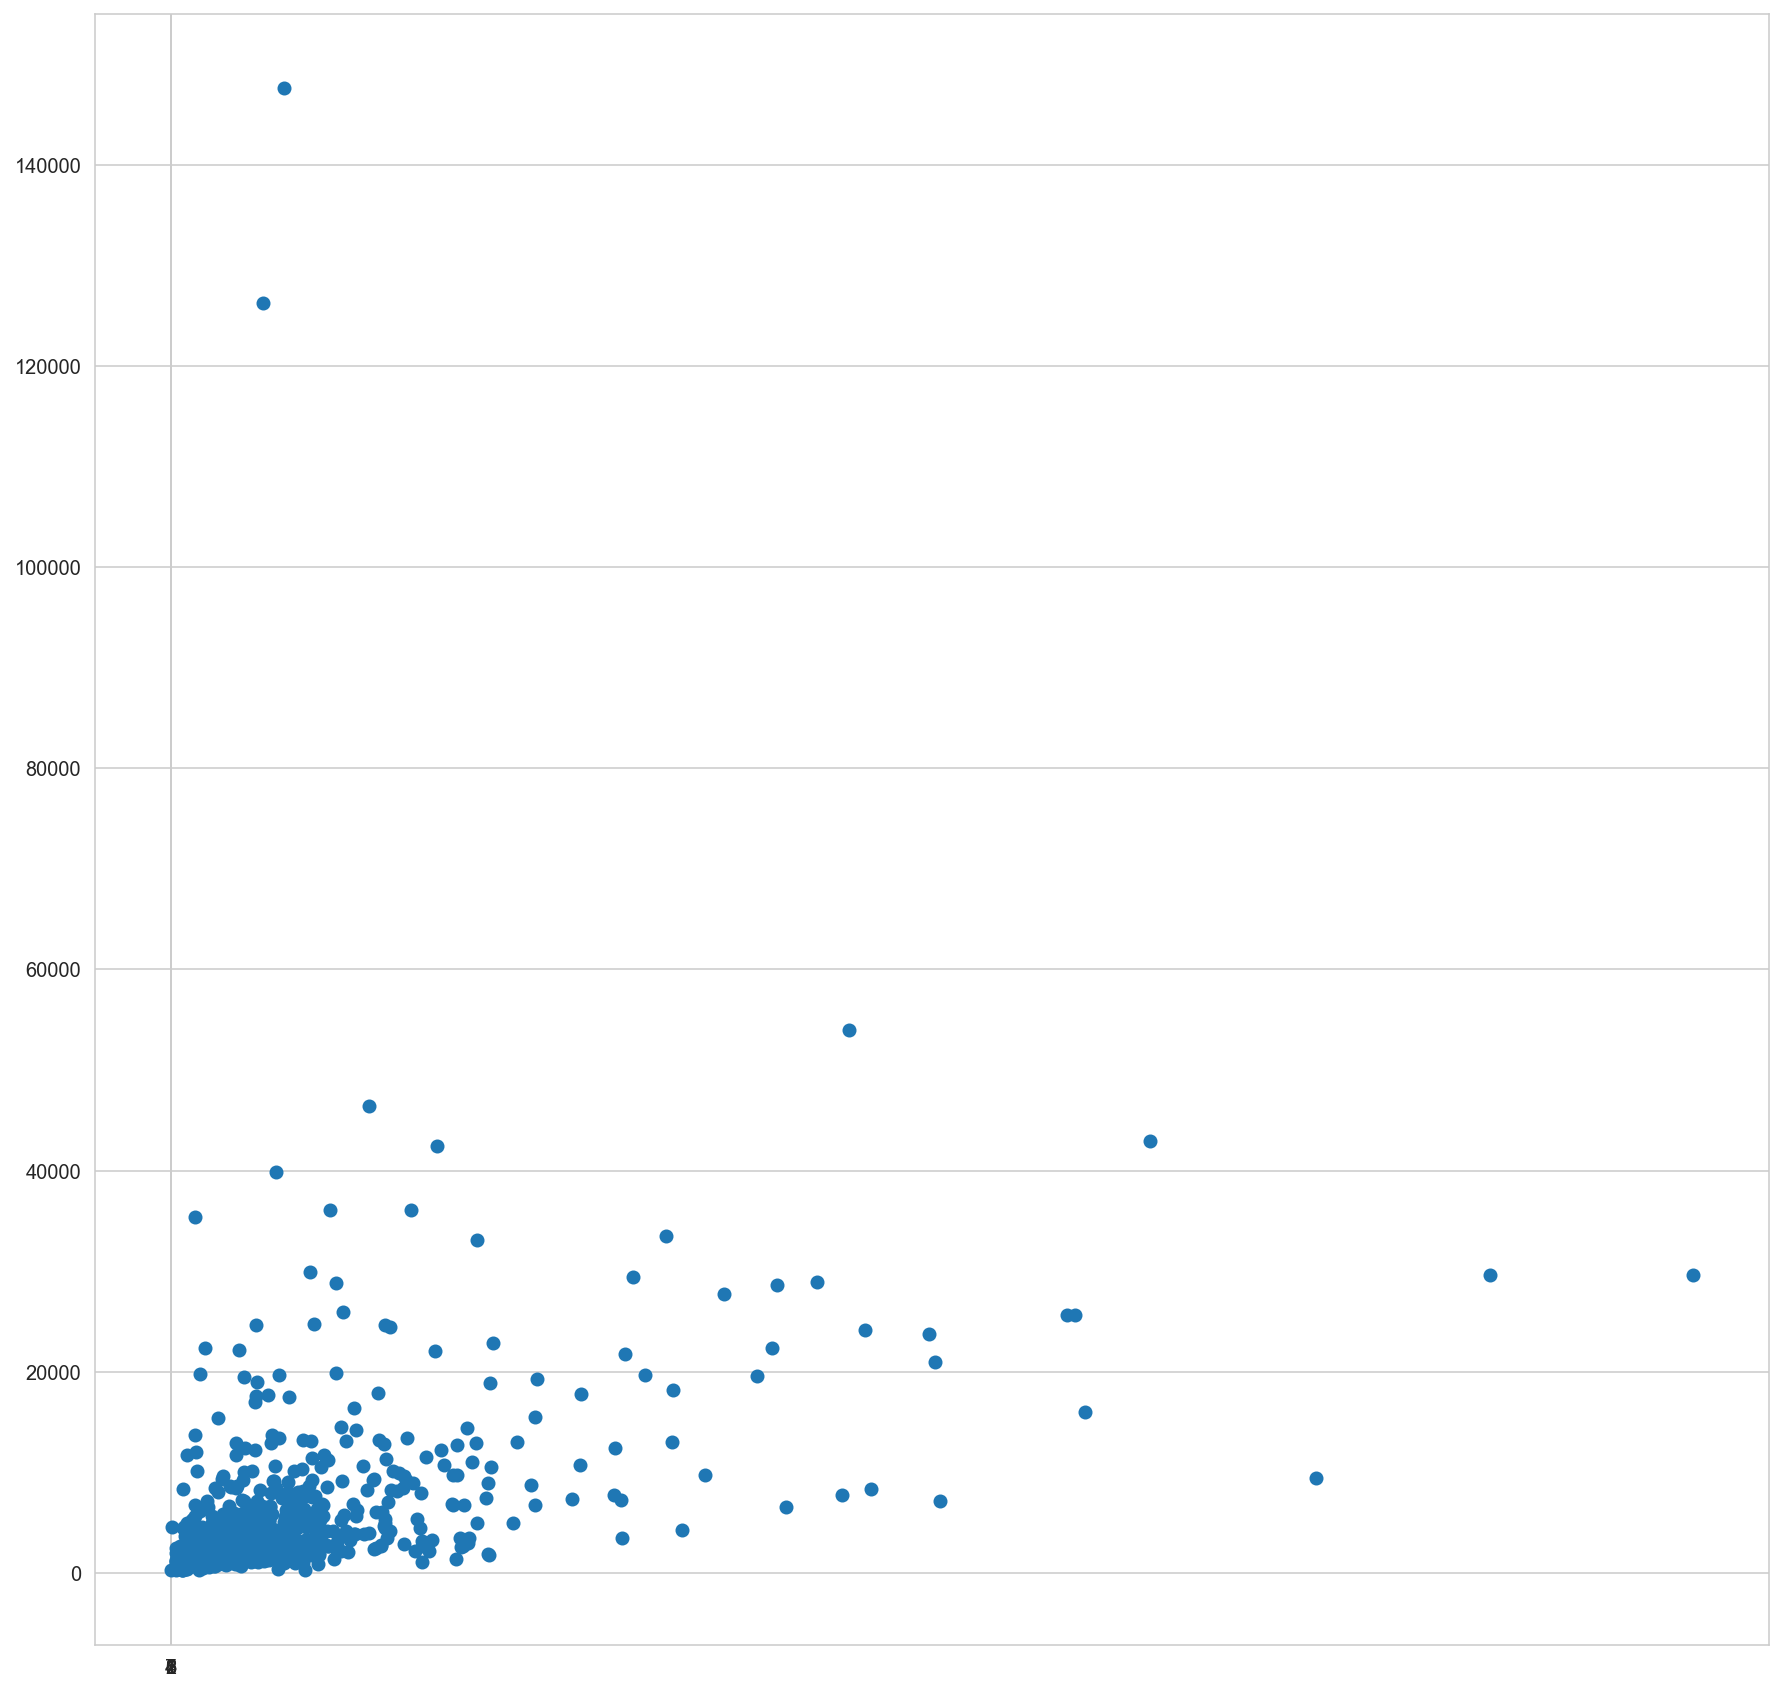

In [38]:
#종속변수: Average viewers, Followers
from matplotlib import rc
fig = plt.figure(figsize = (15, 15))
plt.scatter(df['Followers'], df['Average viewers'])
plt.xticks(range(1, 8))
plt.xticks(range(1, 8))
plt.show()

In [39]:
import statsmodels.api as sm # 추정 및 검정, 회귀분석, 시계열분석 등의 기능을 제공하는 패키지
feature = sm.add_constant(df['Followers'], has_constant='add')
model = sm.OLS(df['Average viewers'], feature)#최소 자승법 잔차제곱합(RSS: Residual Sum of Squares)를
fitted_model = model.fit()              #   최소화하는 가중치 벡터를 구함
print(fitted_model.params)

const        2215.172806
Followers       0.004501
dtype: float64


In [40]:
feature.tail()

,const,Followers
995,1.0,601927
996,1.0,213212
997,1.0,109068
998,1.0,547446
999,1.0,178553


In [41]:
pred_datas = np.dot(feature, fitted_model.params)

In [43]:
 df.iloc[46], df.iloc[15], df.iloc[990], df.iloc[52], df.iloc[15], df.iloc[111]  

(Channel                         LCK
 Watch time(Minutes)      1351758525
 Stream time(minutes)          37140
 Peak viewers                 171861
 Average viewers               36030
 Followers                    934688
 Followers gained             307853
 Views gained               28970100
 Partnered                         1
 Mature                            0
 Language                    English
 Date                    2.25792e+06
 English                           1
 Name: 46, dtype: object,
 Channel                 MontanaBlack88
 Watch time(Minutes)         2408460990
 Stream time(minutes)             67740
 Peak viewers                    181600
 Average viewers                  33514
 Followers                      2911316
 Followers gained               1101093
 Views gained                  37189666
 Partnered                            1
 Mature                               1
 Language                        German
 Date                       3.78432e+06
 English     

<Figure size 1440x576 with 0 Axes>

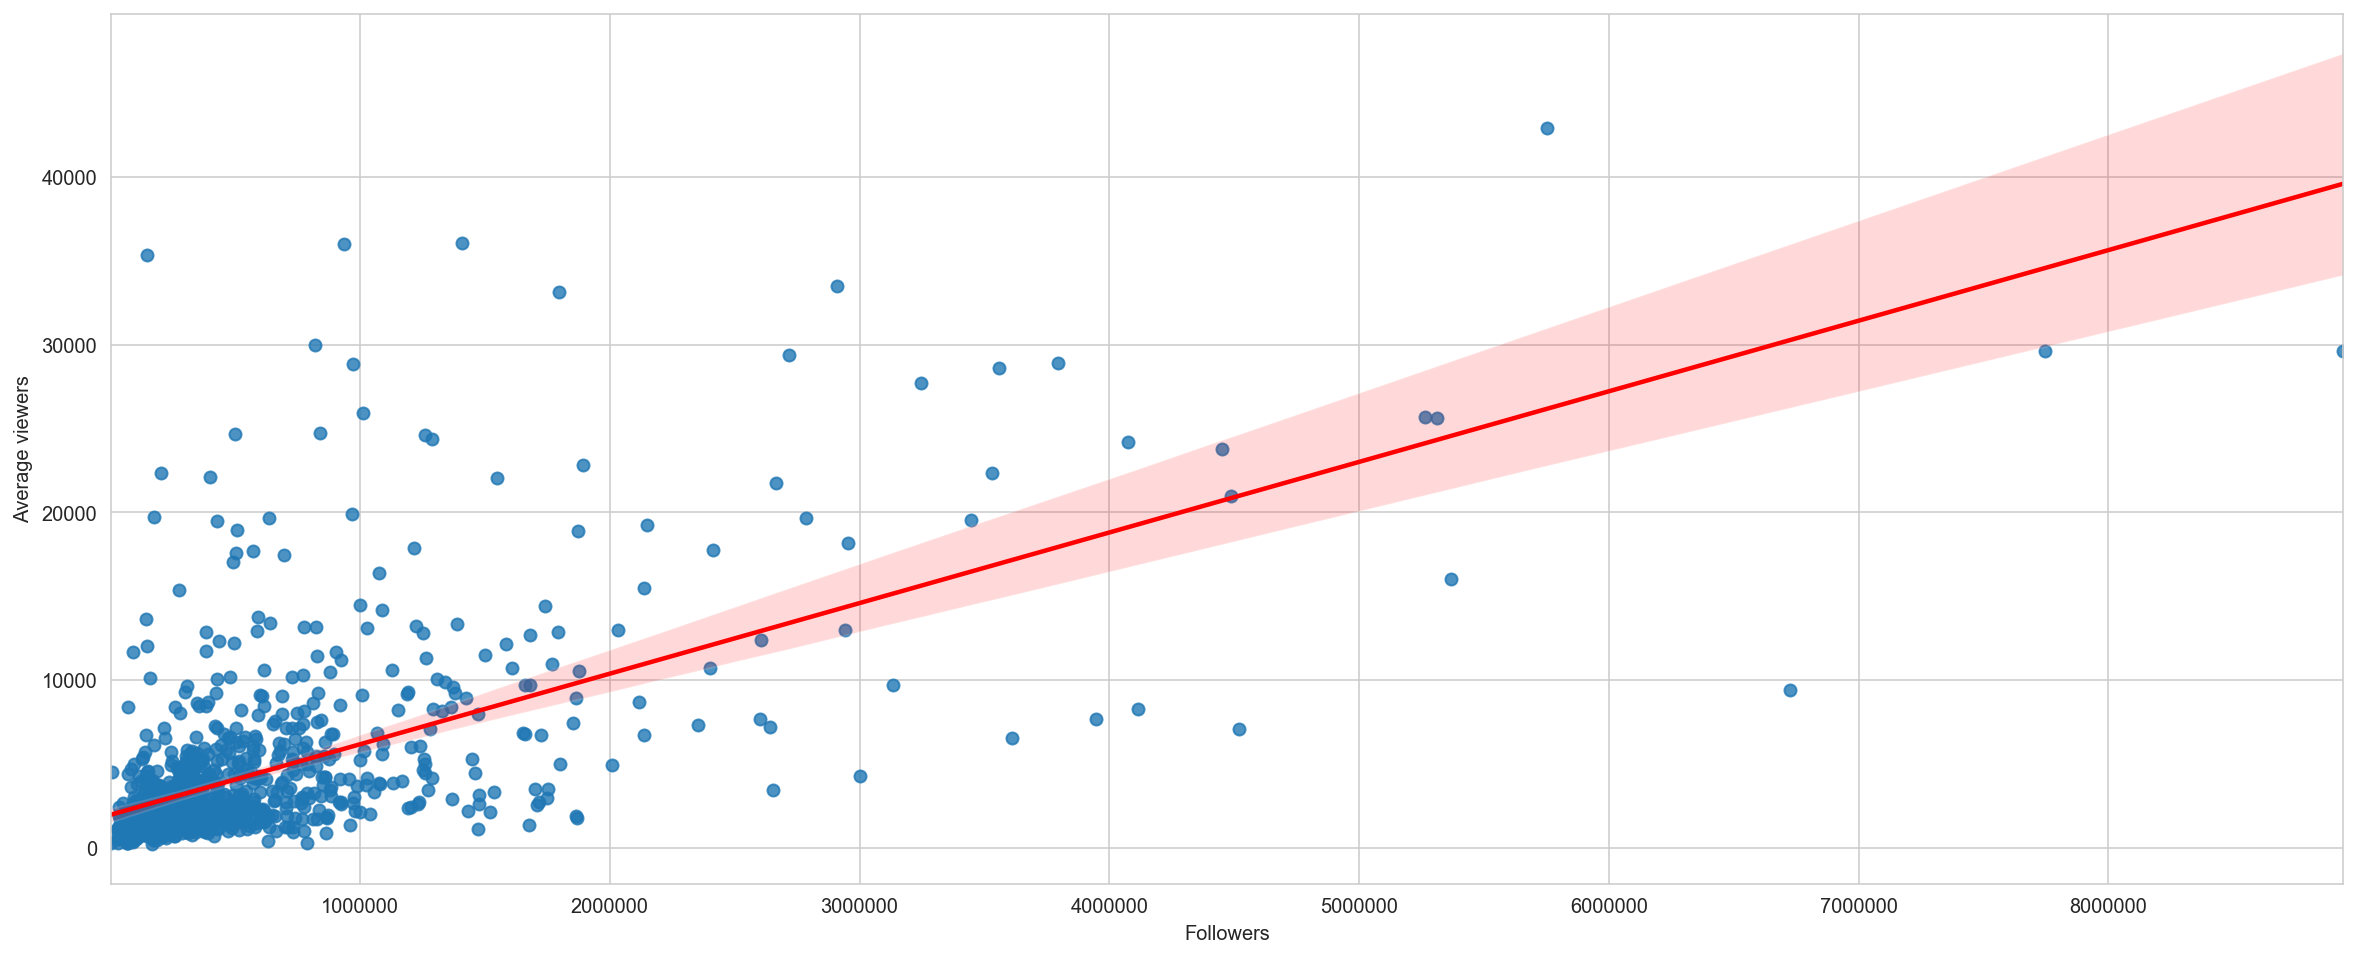

In [44]:
# 이상치제거 후, 그래프 선형적인 모양을 보임
plt.figure(figsize=(20,8))
sns.set_style('whitegrid')
sns.regplot(x='Followers', y='Average viewers', data=df.drop(index=[5,14,21,41,81,109]), line_kws={'color':'red'})

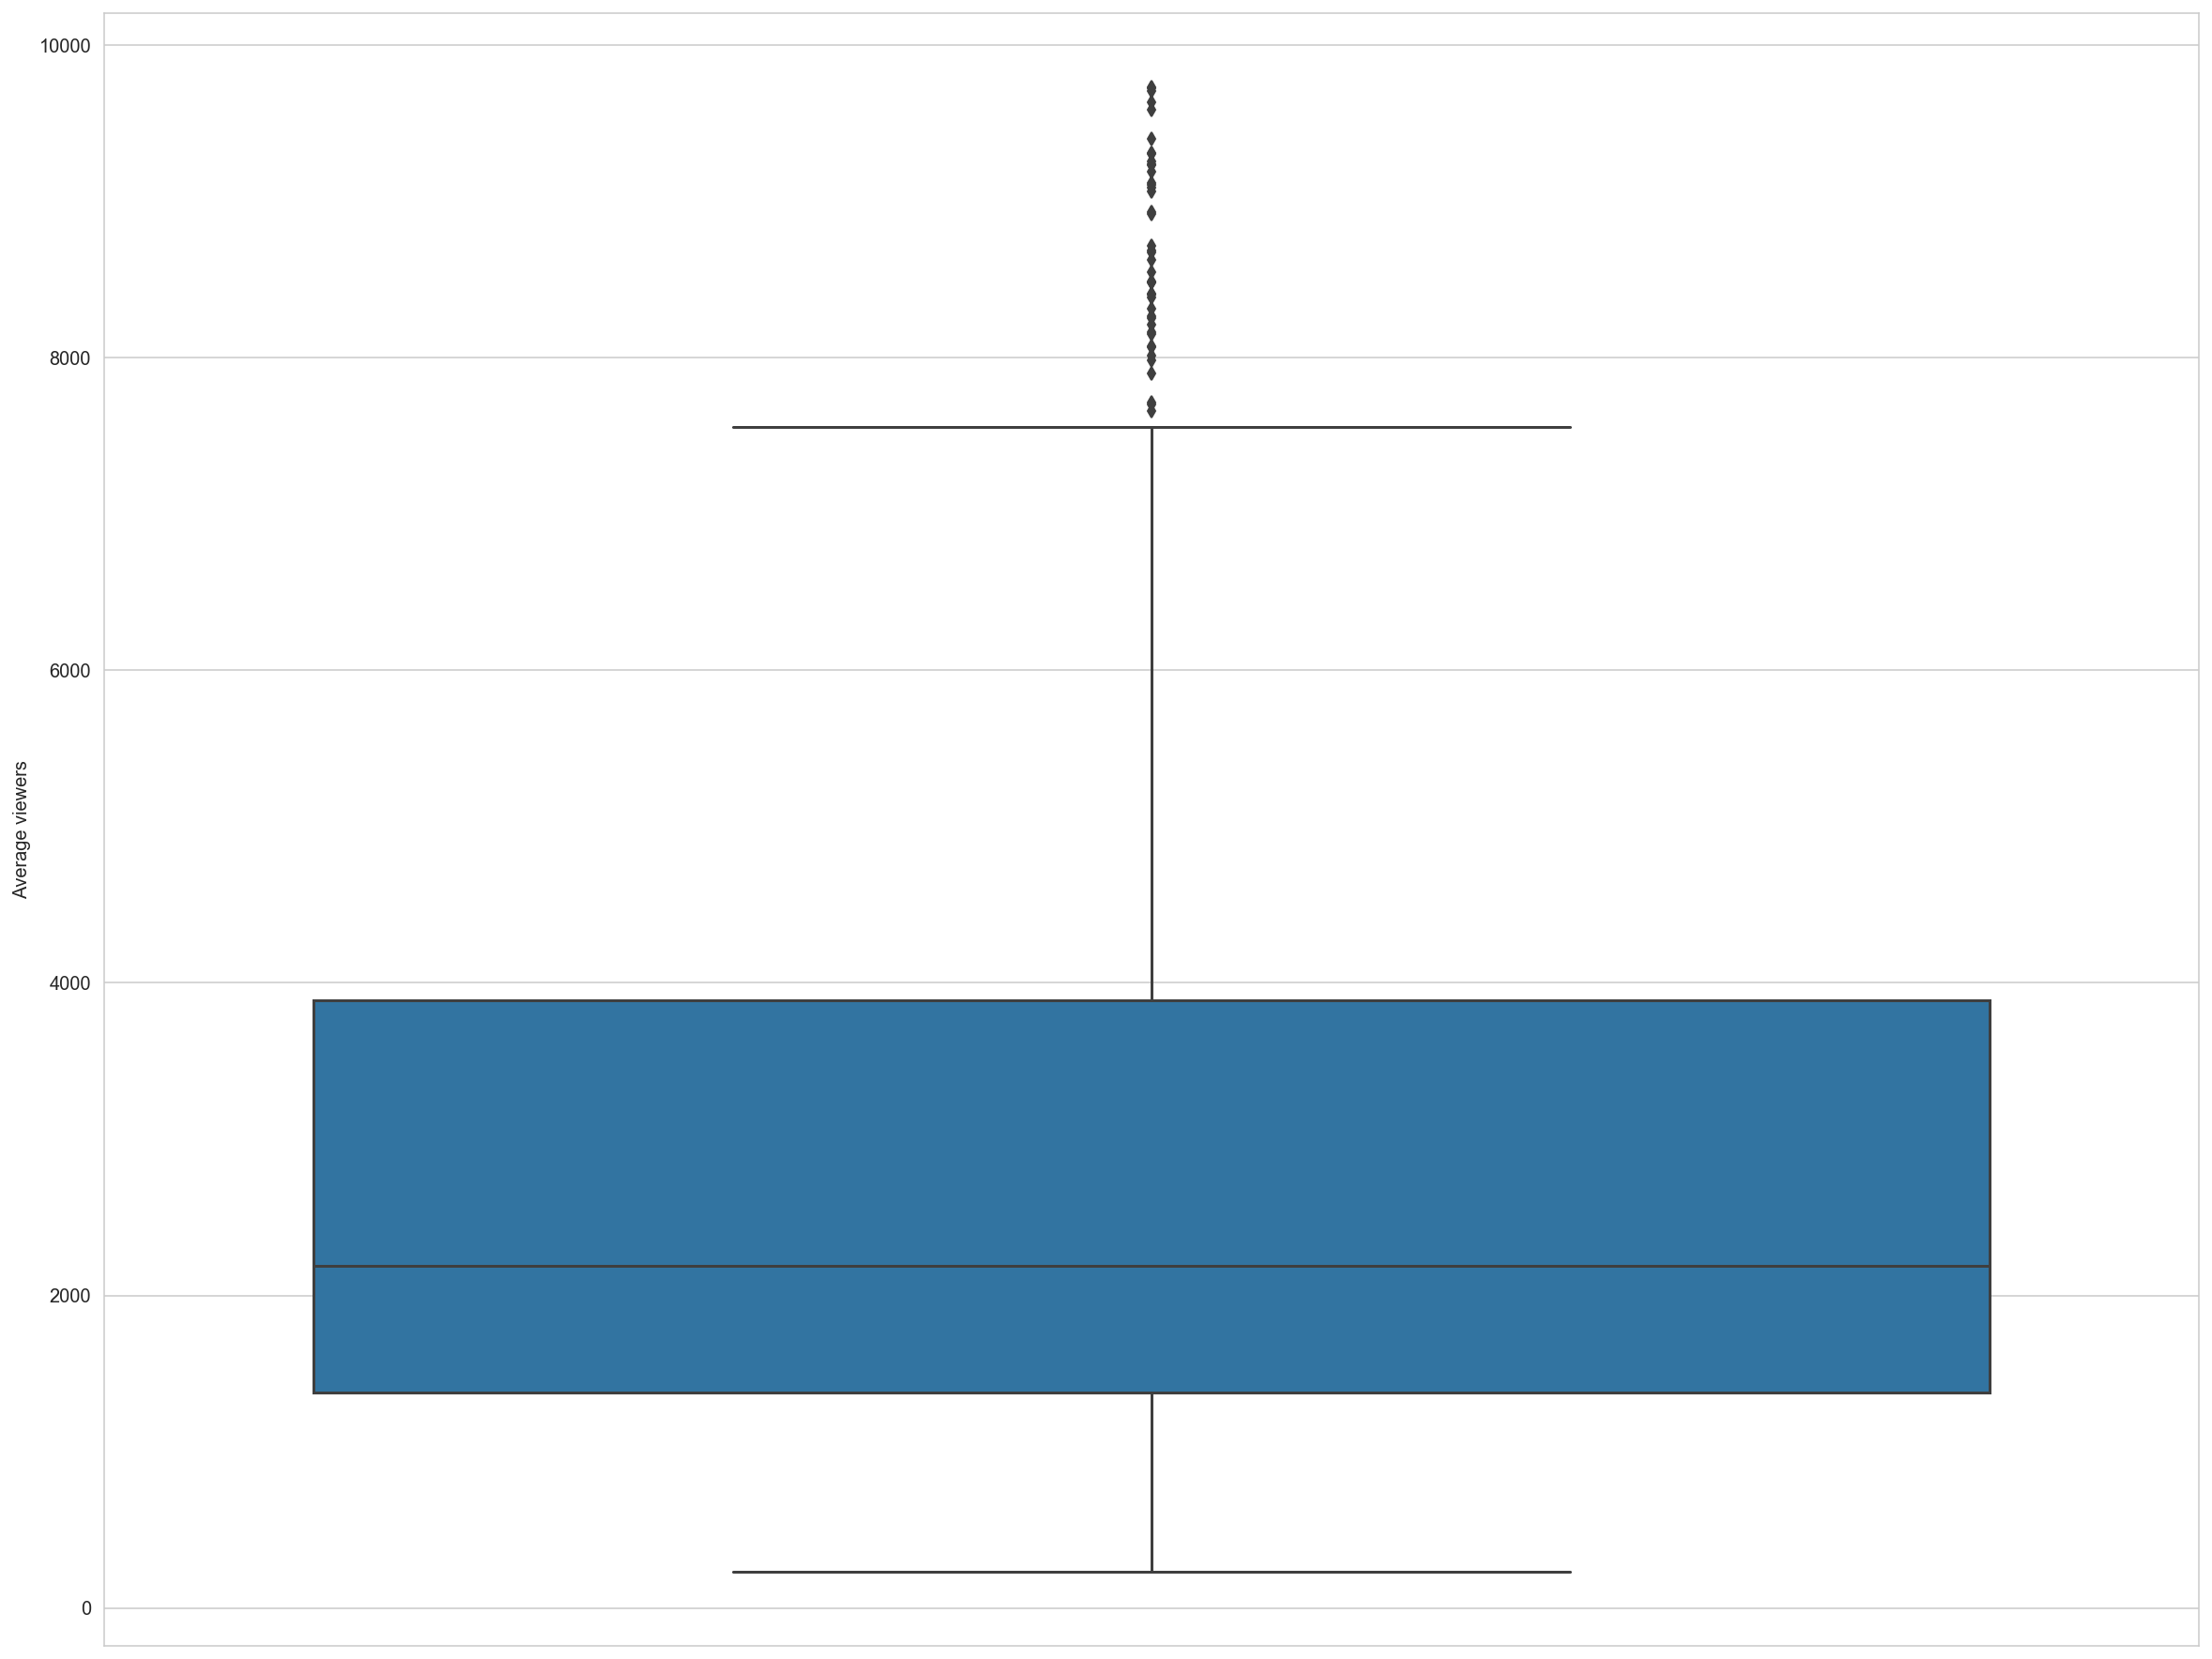

In [22]:
plt.figure(figsize=(20,16))
Rdf_a = sns.boxplot(y=Rdf['Average viewers'])
plt.show()

### outlier

In [45]:
from collections import Counter

In [46]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    
  # target 값과 상관관계가 높은 열을 우선적으로 진행
    quantile_25 = np.percentile(df['Average viewers'].values, 25)
    quantile_75 = np.percentile(df['Average viewers'].values, 75)

    IRQ = quantile_75 - quantile_25
    IRQ_weight = IRQ*weight
  
    lowest = quantile_25 - IRQ_weight
    highest = quantile_75 + IRQ_weight

    outlier_idx = df['Average viewers'][(df['Average viewers'] < lowest) | (df['Average viewers'] > highest)].index
    return outlier_idx

# 함수 사용해서 이상치 값 삭제
outlier_idx = get_outlier(df=df, column='A', weight=1.5)


In [47]:
Rdf = df.drop(outlier_idx, axis=0)

In [48]:
Rdf.tail()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language,Date,English
995,LITkillah,122524635,13560,21359,9104,601927,562691,2162107,1,0,Spanish,119520.0,0
996,bighead033,122523705,153000,3940,793,213212,52289,4399897,1,0,Korean,2286720.0,0
997,newmasca,122452320,217410,6431,567,109068,-4942,3417970,1,0,Korean,2610720.0,0
998,AndyMilonakis,122311065,104745,10543,1153,547446,109111,3926918,1,0,English,3565440.0,1
999,Remx,122192850,99180,13788,1205,178553,59432,2049420,1,0,French,3520800.0,0


In [49]:
len(Rdf)

900

In [23]:
Rdf.tail()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language,Date
995,LITkillah,122524635,13560,21359,9104,601927,562691,2162107,True,False,Spanish,2020-06-09 00:14:00
996,bighead033,122523705,153000,3940,793,213212,52289,4399897,True,False,Korean,2016-04-26 10:16:00
997,newmasca,122452320,217410,6431,567,109068,-4942,3417970,True,False,Korean,2015-09-14 12:33:00
998,AndyMilonakis,122311065,104745,10543,1153,547446,109111,3926918,True,False,English,2013-11-20 10:15:00
999,Remx,122192850,99180,13788,1205,178553,59432,2049420,True,False,French,2013-12-21 00:22:00


#### 아웃라이어 탐색

In [53]:
quantile_25 = Rdf.quantile(0.25)
quantile_75 = Rdf.quantile(0.75)
IRQ = quantile_75 - quantile_25

In [54]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [55]:
pd.set_option('display.max_rows', 1000)
# 최대 열 수 설정
pd.set_option('display.max_columns', 500)
# 표시할 가로의 길이
pd.set_option('display.width', 2000)


In [56]:
condition = (Rdf < (quantile_25 - 1.5 * IRQ)) | (Rdf > (quantile_75 + 1.5 * IRQ ))
condition = condition.any(axis=1)
out_Rdf = Rdf[condition]
out_Rdf.tail()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language,Date,English
988,CallMeCarsonLIVE,123486240,14340,61531,8208,1151712,732108,3533199,1,1,English,3029760.0,1
992,RelaxBeats,123273930,521430,2830,235,166162,29595,1094850,1,0,English,1771200.0,1
993,LAGTVMaximusBlack,123125340,161535,7138,725,256353,13251,2310313,1,1,English,4767840.0,1
994,Destructoid,122628630,103020,14566,1190,48007,8995,87603521,1,0,English,5963040.0,1
995,LITkillah,122524635,13560,21359,9104,601927,562691,2162107,1,0,Spanish,119520.0,0


In [57]:
#이상치 추출
count = 0
for index, T in enumerate(out_Rdf['Views gained'] > 70000000):
    if T == True:
        print(index, end='')
        print(T, end='//')
    else:
        pass

0True//5True//110True//197True//308True//420True//

이상치 출력

In [58]:
out_Rdf.index

Int64Index([  3,  27,  29,  30,  33,  34,  35,  37,  40,  44,
            ...
            978, 980, 983, 984, 985, 988, 992, 993, 994, 995], dtype='int64', length=422)

In [59]:
df.iloc[[0,5,110,197,308,420]]

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language,Date,English
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,1,0,English,3139200.0,1
5,Asmongold,3668799075,82260,263720,42414,1563438,554201,61715781,1,0,English,4618080.0,1
110,uzra,812362125,208785,14181,3683,185506,29752,20715640,1,0,Chinese,5469120.0,0
197,Vinesauce,536989080,86790,19065,6125,442493,80616,5560969,1,1,English,4654080.0,1
308,MarcaoRX,359273445,336690,5210,1258,166594,65904,4541683,1,1,Portuguese,1365120.0,0
420,thedarkness,280707810,155595,7440,1914,536792,138160,7628946,1,0,Portuguese,3546720.0,0


In [6]:
##### 상위 세개 Rdf['Followers'] 아웃라이어

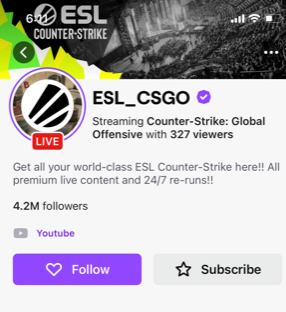

In [2]:
from IPython.display import Image 
Image('datas/1.png')

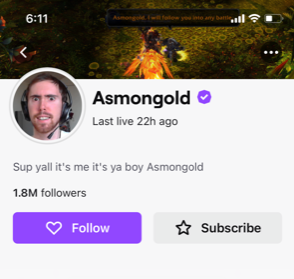

In [5]:
from IPython.display import Image 
Image('datas/2.png')

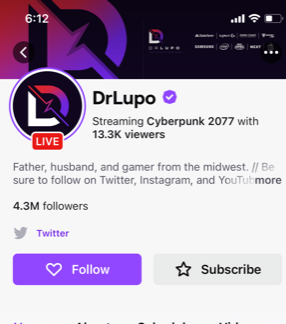

In [4]:
from IPython.display import Image 
Image('datas/3.png')

<Figure size 1440x1296 with 0 Axes>

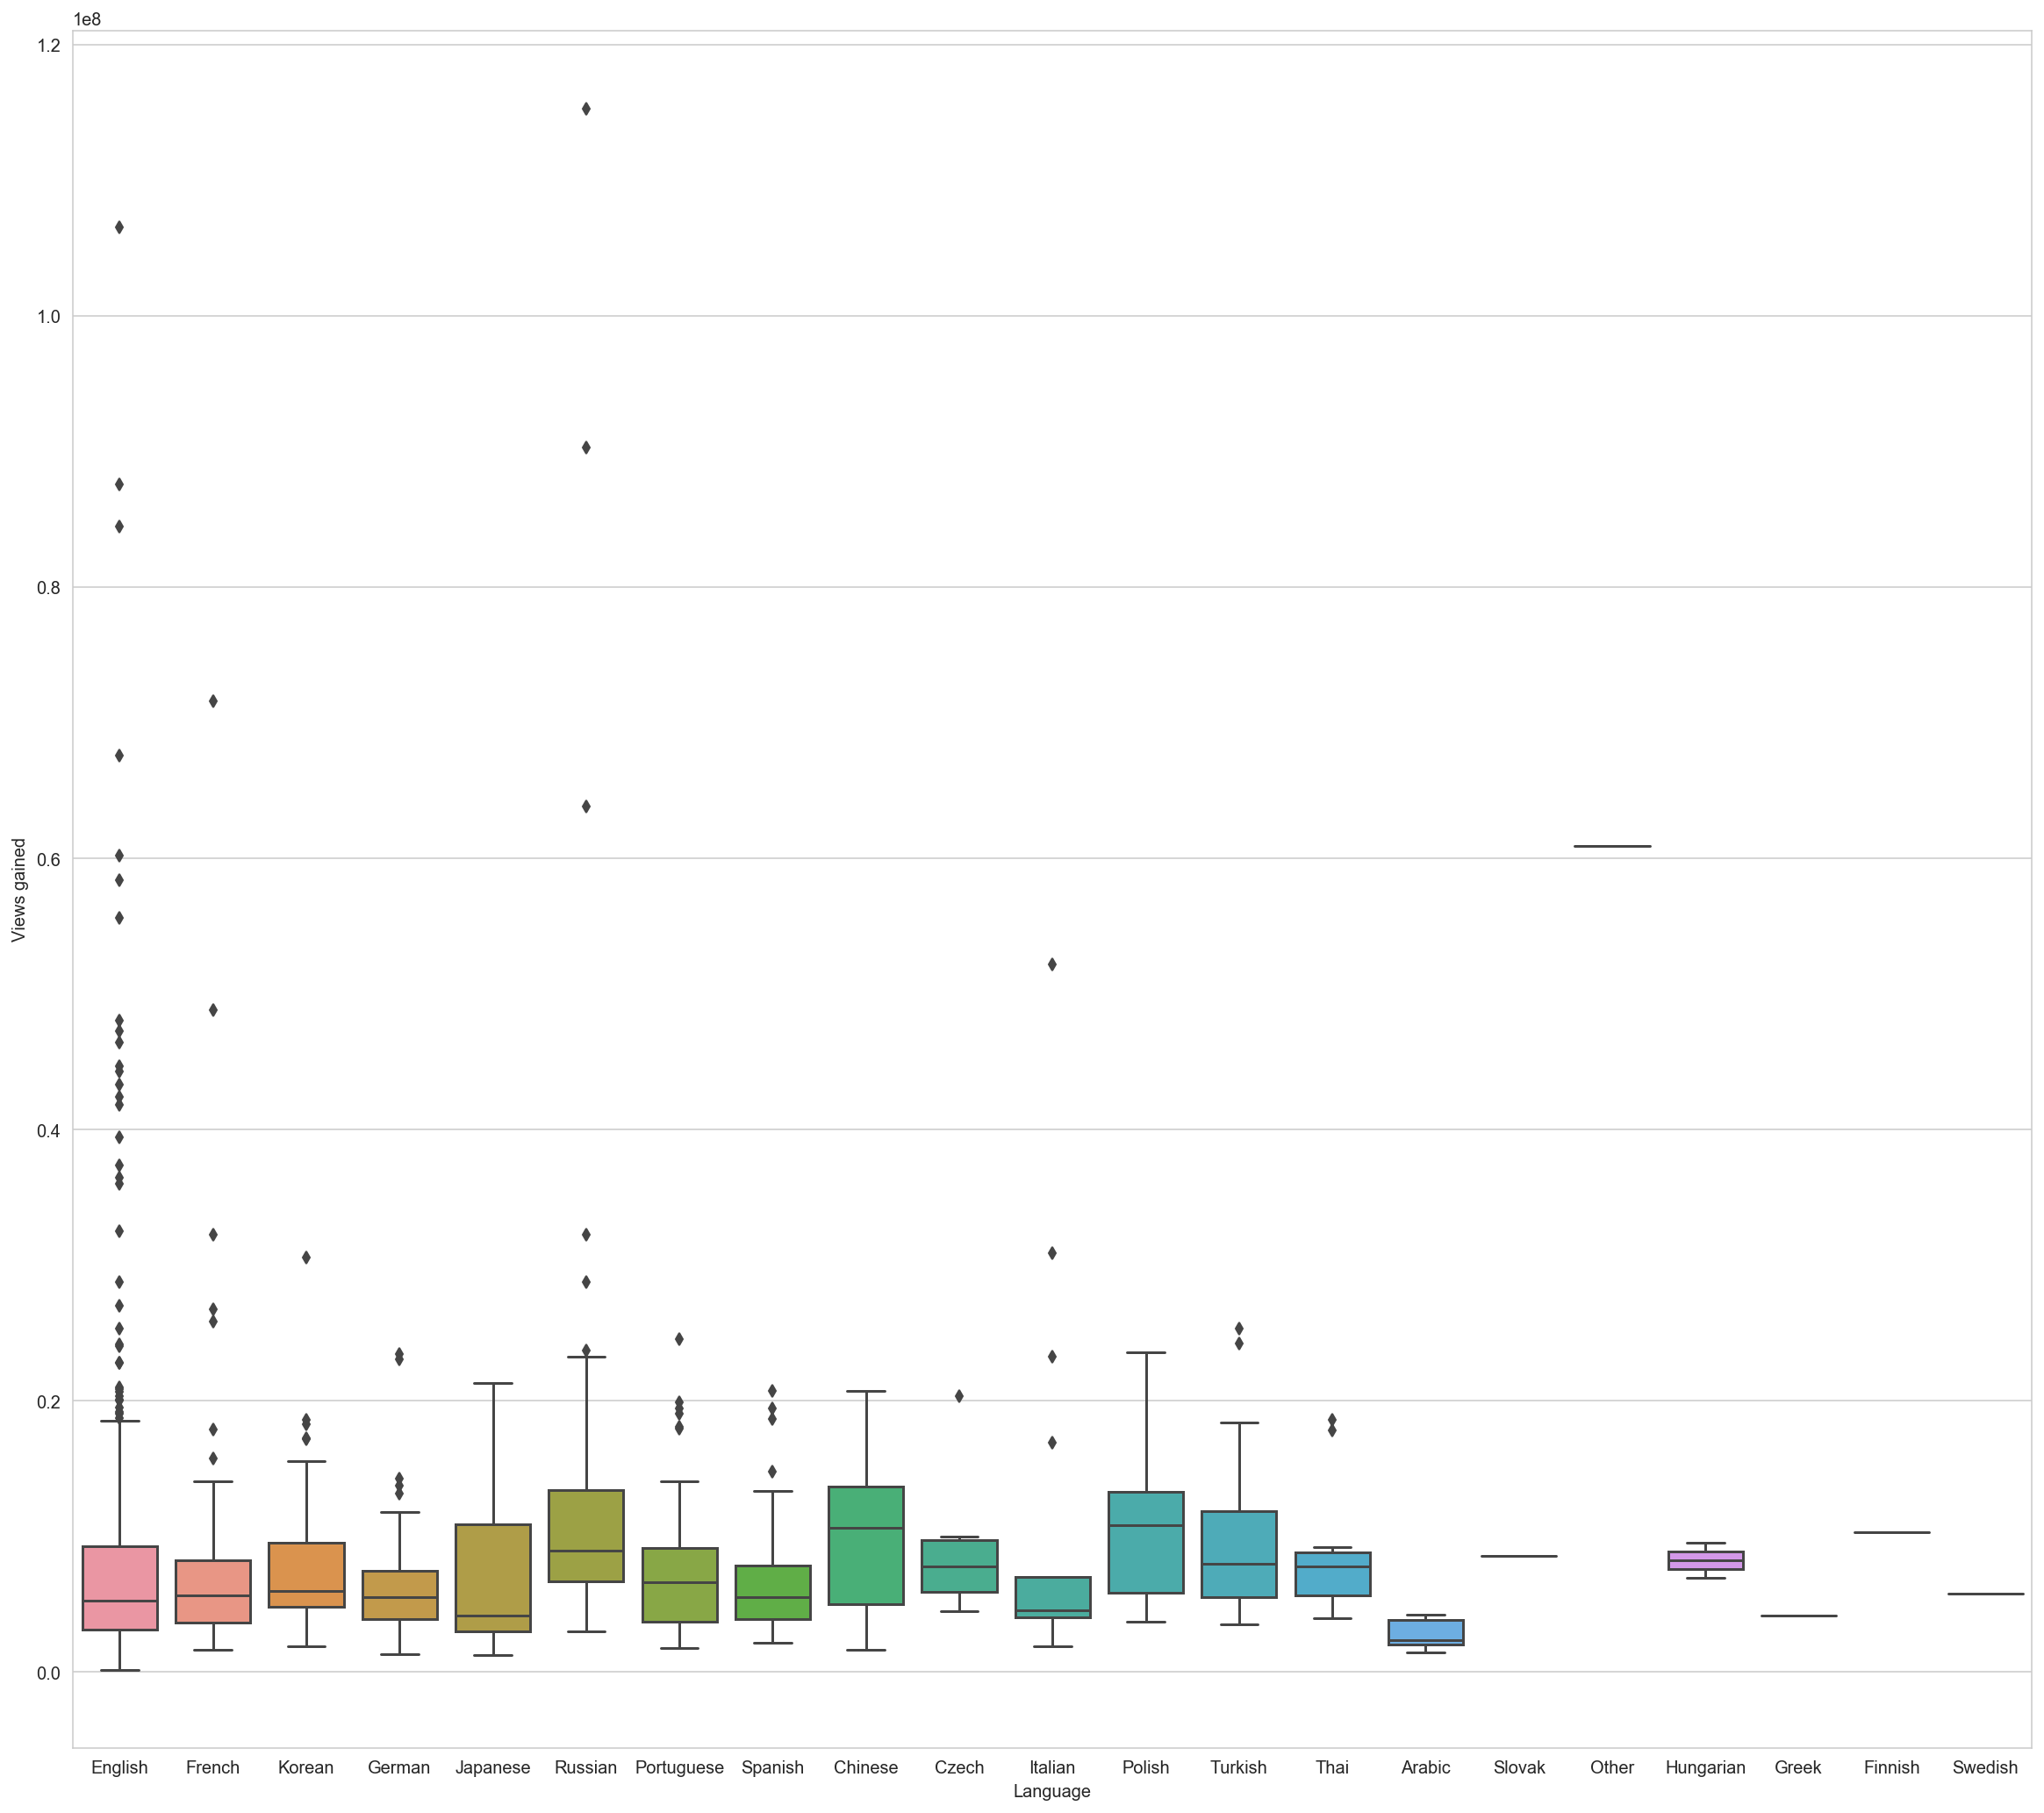

In [51]:
plt.figure(figsize=(20, 18))
sns.boxplot(x='Language', y='Views gained', data=Rdf)
plt.show()

In [58]:
Ldf = df.loc[:,['Language','Partnered','Followers']]
Ldf.tail()

,Language,Partnered,Followers
995,Spanish,True,601927
996,Korean,True,213212
997,Korean,True,109068
998,English,True,547446
999,French,True,178553


In [67]:
result = df.groupby(df['Language']).mean() # 언어별로 가중치가 다르므로 일괄적으로 합계평균하는건 의미가 없다
corr = result.corr(method = 'pearson')
corr

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature
Watch time(Minutes),1.000000,-0.058544,0.503527,0.622059,0.377708,0.244136,0.088504,0.007986,-0.449264
Stream time(minutes),-0.058544,1.000000,-0.637967,-0.699527,-0.673160,-0.681843,0.568853,-0.533502,0.242316
Peak viewers,0.503527,-0.637967,1.000000,0.873358,0.865010,0.855819,-0.136570,0.143477,-0.312768
Average viewers,0.622059,-0.699527,0.873358,1.000000,0.716646,0.698563,-0.206860,0.237916,-0.423781
Followers,0.377708,-0.673160,0.865010,0.716646,1.000000,0.880320,-0.296051,0.317392,-0.142932
Followers gained,0.244136,-0.681843,0.855819,0.698563,0.880320,1.000000,-0.203094,0.179086,-0.256645
Views gained,0.088504,0.568853,-0.136570,-0.206860,-0.296051,-0.203094,1.000000,-0.980724,-0.196911
Partnered,0.007986,-0.533502,0.143477,0.237916,0.317392,0.179086,-0.980724,1.000000,0.214526
Mature,-0.449264,0.242316,-0.312768,-0.423781,-0.142932,-0.256645,-0.196911,0.214526,1.000000


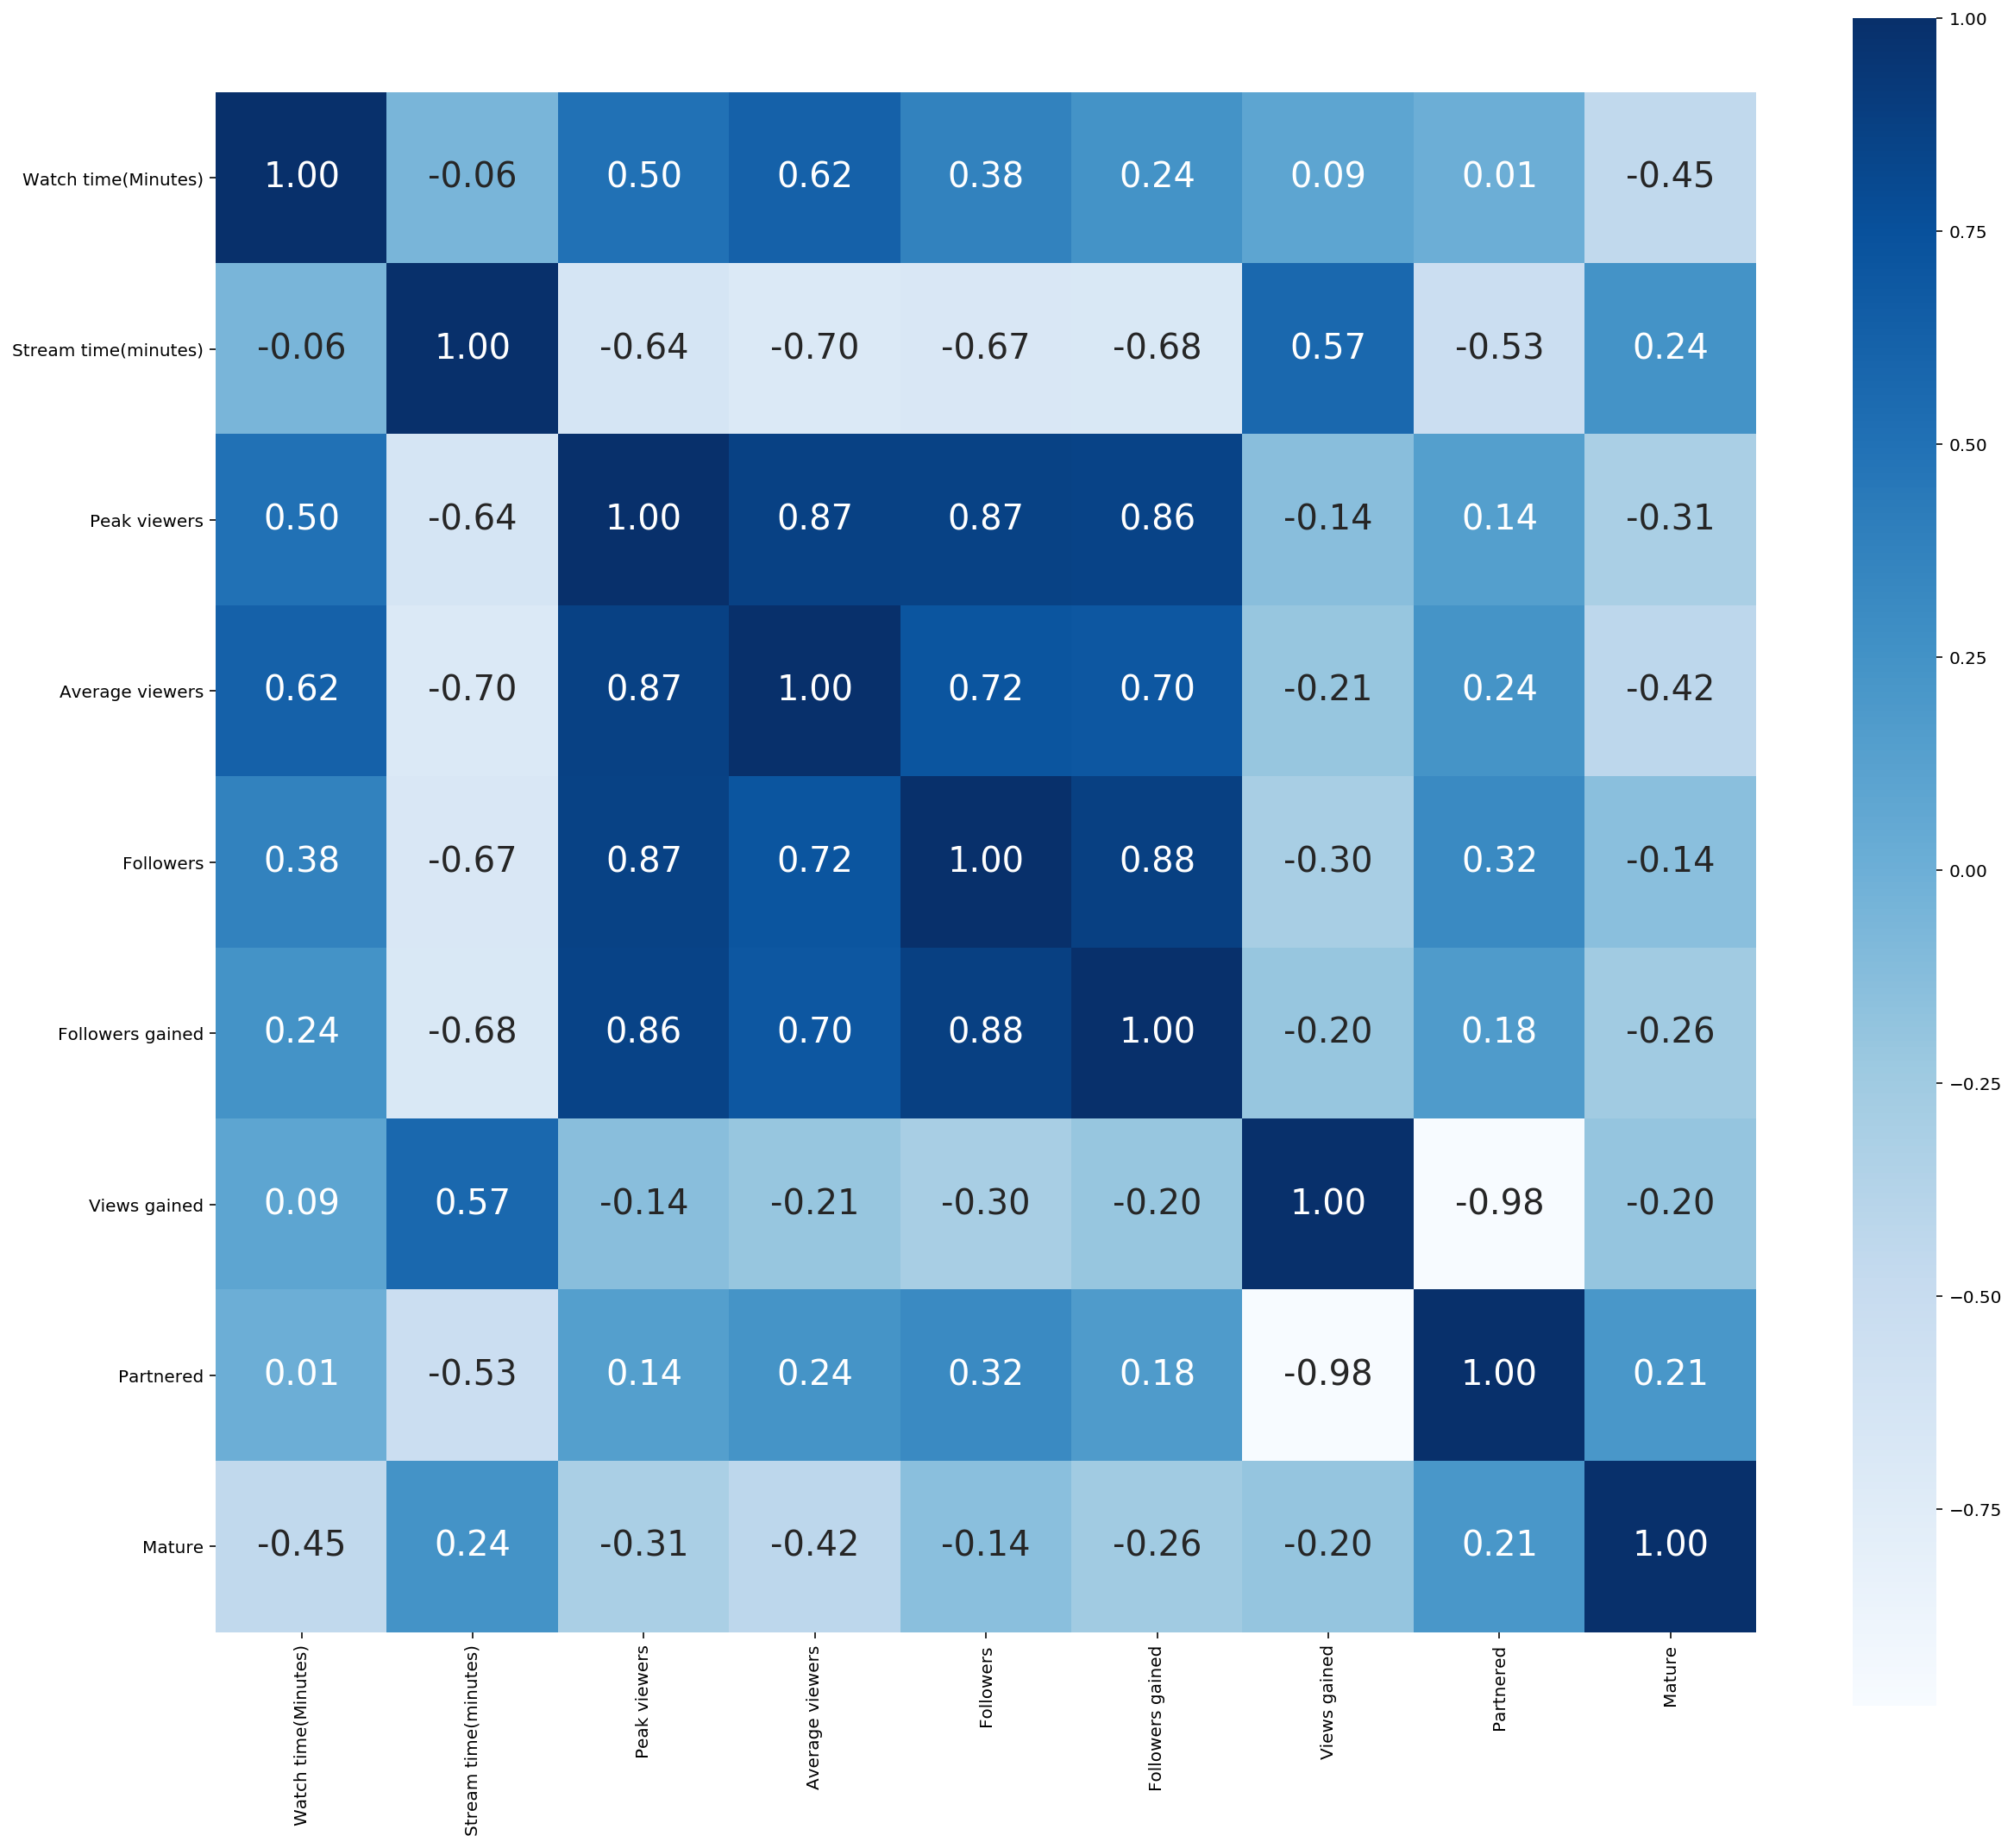

In [80]:
plt.figure(figsize=(20,18))
ys_hmp = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 20}, fmt = '.2f',
                     square = True, cmap = 'Blues')

0.7 < Followers/peak viewers, Followers gained/peak viewers, Average viewers/peak viewers
followers/avereage viewers, followers/average viewers, 
followers gained/followers 

-0.7 > stream time      ,  -0.98   

In [36]:
df.tail()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language,Date
995,LITkillah,122524635,13560,21359,9104,601927,562691,2162107,True,False,Spanish,2020-06-09 0:14
996,bighead033,122523705,153000,3940,793,213212,52289,4399897,True,False,Korean,2016-04-26 10:16
997,newmasca,122452320,217410,6431,567,109068,-4942,3417970,True,False,Korean,2015-09-14 12:33
998,AndyMilonakis,122311065,104745,10543,1153,547446,109111,3926918,True,False,English,2013-11-20 10:15
999,Remx,122192850,99180,13788,1205,178553,59432,2049420,True,False,French,2013-12-21 0:22


 enumerate()
 리스트가 있는 경우 순서와 리스트의 값을 전달하는 기능을 가짐
 순서가 있는 자료형(list, set, tuple, dict, string)을 입력 받아, 인덱스 값을 포함하는 enumerate 객체를 리턴

In [61]:
# Mature의 비율에 따라 컬럼 넣을지 결정(일반방송이 100개이하면, drop)
l = []
count = 0
for idx, i in enumerate(df['Mature']):
    if i == True:
        count += 1
        l = i
        #print(idx, l, count)

In [68]:
target = Rdf[['Average viewers']]
follow = Rdf[['Followers']]
followg = Rdf[['Followers gained']] 
peakV = Rdf[['Peak viewers']]
stime = Rdf[['Stream time(minutes)']]


In [69]:
# 팔로워수와 평균시청자수
feature_1 = sm.add_constant(follow, has_constant='add')
model_1 = sm.OLS(target, feature_1).fit()

# 팔로워증가수와 평균시청자수
feature_2 = sm.add_constant(followg, has_constant='add')
model_2 = sm.OLS(target, feature_2).fit()

# 최대 방문자수와 평균시청자수
feature_3 = sm.add_constant(peakV, has_constant='add')
model_3 = sm.OLS(target, feature_3).fit()

# 방송시간과 평균시청자수 
feature_4 = sm.add_constant(stime, has_constant='add')
model_4 = sm.OLS(target, feature_4).fit()

In [70]:
df.columns

Index(['Channel', 'Watch time(Minutes)', 'Stream time(minutes)', 'Peak viewers', 'Average viewers', 'Followers', 'Followers gained', 'Views gained', 'Partnered', 'Mature', 'Language', 'Date', 'English'], dtype='object')

In [71]:
# target(Views gained)과 features(averageV, peakV, stime)값과의 상관계수 값
columns =['Watch time(Minutes)', 'Stream time(minutes)', 'Peak viewers', 'Average viewers',
          'Followers', 'Followers gained', 'Views gained', 'Partnered', 'Mature', 'Language',
          'Date', 'English']
df[columns].corr()['Average viewers']

Watch time(Minutes)     0.476165
Stream time(minutes)   -0.249248
Peak viewers            0.682637
Average viewers         1.000000
Followers               0.428303
Followers gained        0.420097
Views gained            0.250349
Partnered              -0.008983
Mature                 -0.081648
Date                    0.002039
English                 0.038105
Name: Average viewers, dtype: float64

In [72]:
# 네가지 모델의 r-squred 값 비교 

model_1.rsquared, model_2.rsquared, model_3.rsquared, model_4.rsquared

(0.2497722848393994,
 0.2753730363528225,
 0.2223751917105149,
 0.12162581191913657)

In [73]:
# 예측데이터 만들기
pred_1 = model_1.predict(feature_1)
pred_2 = model_1.predict(feature_2)
pred_3 = model_1.predict(feature_3)
pred_4 = model_1.predict(feature_4)

<Figure size 2880x1080 with 0 Axes>

Text(0.5, 1.0, 'Followers')

Text(0.5, 1.0, 'Followers gained')

Text(0.5, 1.0, 'Peak viewers')

Text(0.5, 1.0, 'Stream time(minutes)')

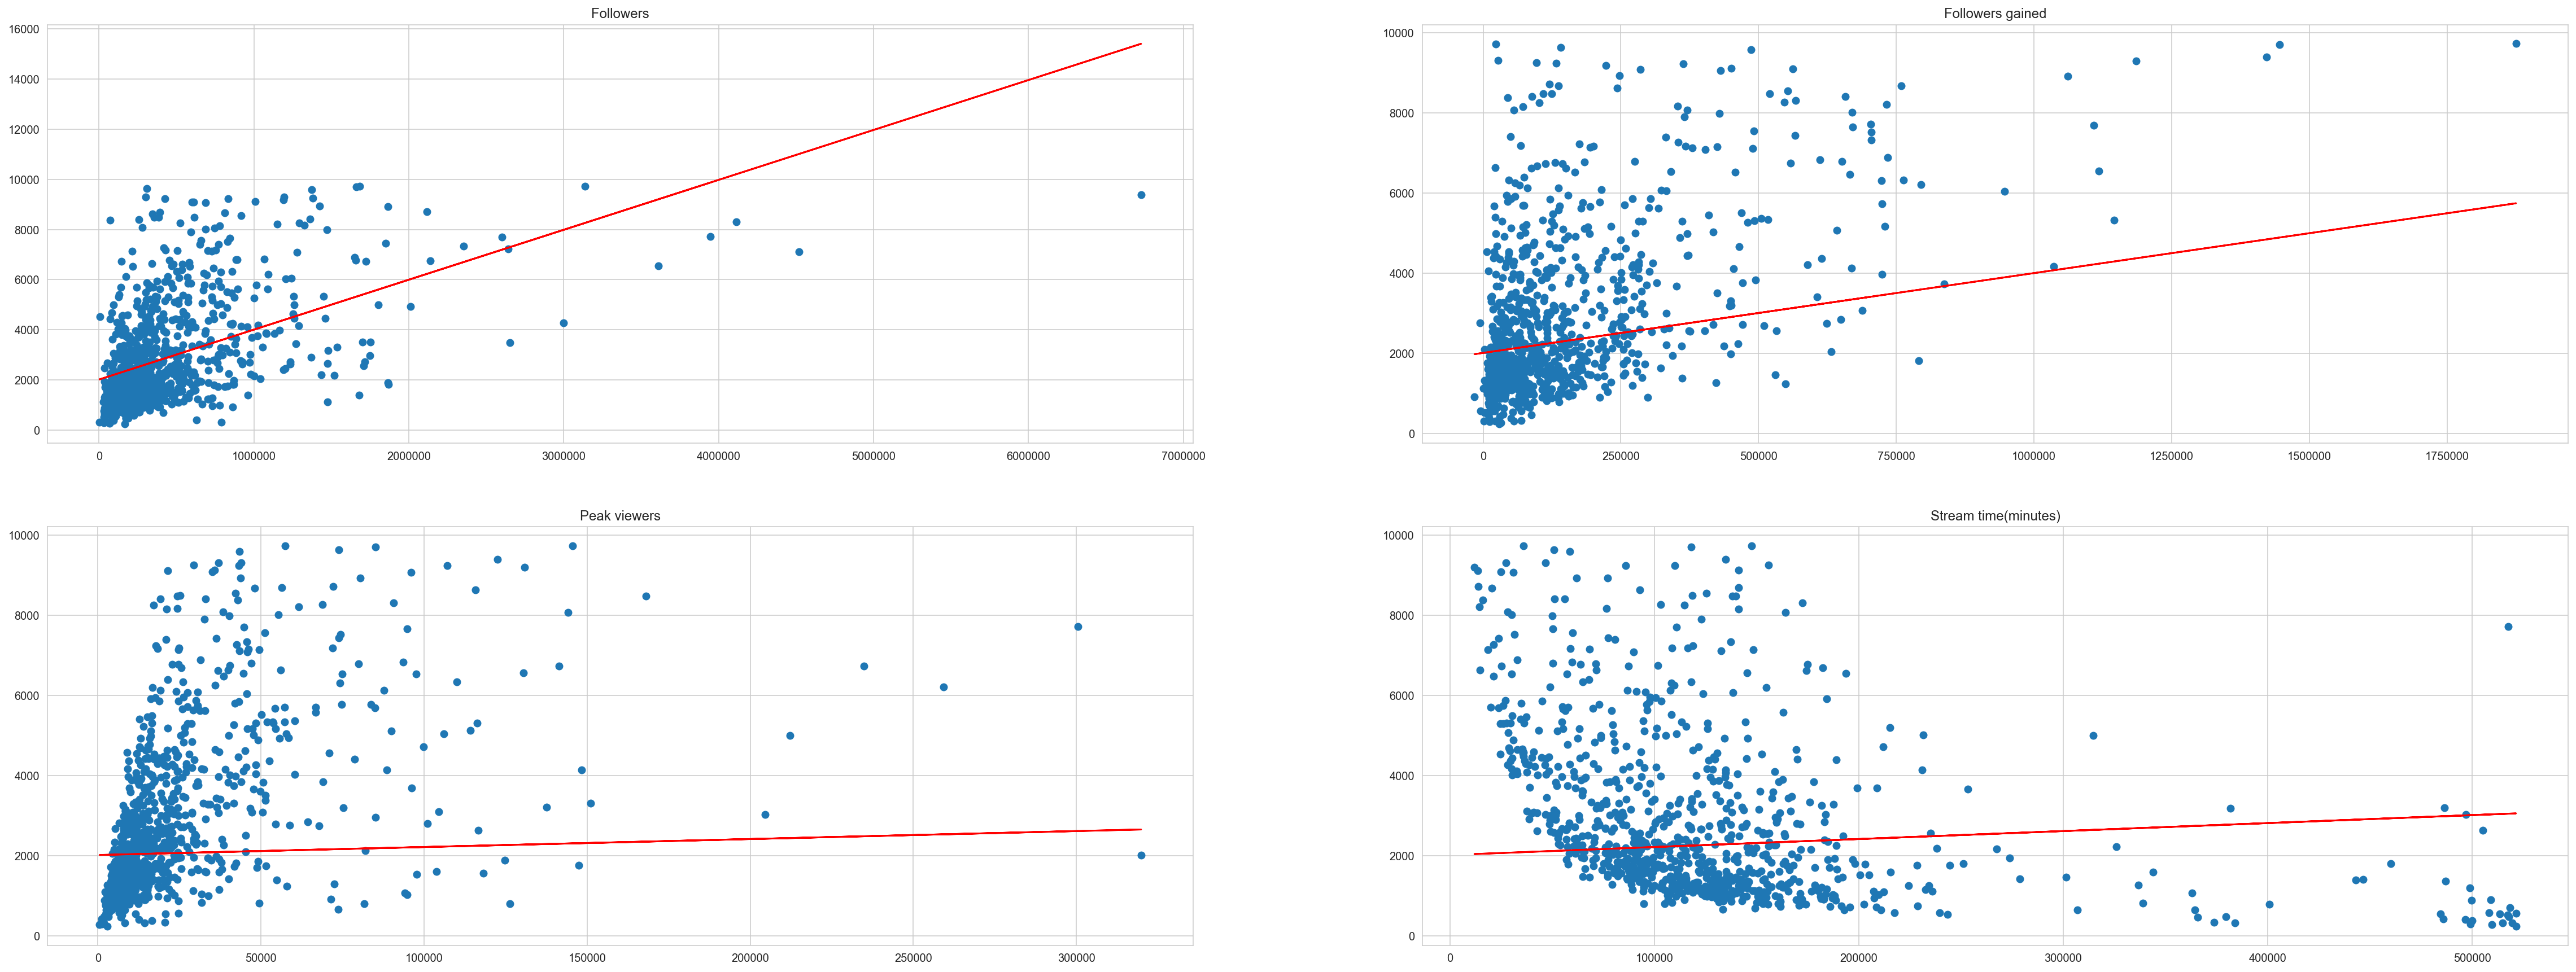

In [74]:
# df로는 선형관계를 볼수 없었으나, 아웃라이어를 제거한 Rdf에서 그래프가 더 좋게 나옴
plt.figure(figsize=(40,15))

plt.subplot(221)
plt.scatter(follow, target)
plt.plot(follow, pred_1, 'r')
plt.title('Followers')

plt.subplot(222)
plt.scatter(followg, target)
plt.plot(followg, pred_2, 'r')
plt.title('Followers gained')

plt.subplot(223)
plt.scatter(peakV, target)
plt.plot(peakV, pred_3, 'r')
plt.title('Peak viewers')

plt.subplot(224)
plt.scatter(stime, target)
plt.plot(stime, pred_4, 'r')
plt.title('Stream time(minutes)')

In [11]:
 df.columns

Index(['Channel', 'Watch time(Minutes)', 'Stream time(minutes)',
       'Peak viewers', 'Average viewers', 'Followers', 'Followers gained',
       'Views gained', 'Partnered', 'Mature', 'Language', 'Date'],
      dtype='object')

In [118]:
target = df[['Average viewers']]
feature_5 = df[['Followers', 'Followers gained', 'Peak viewers','Stream time(minutes)']]
feature_5 = sm.add_constant(feature_5, has_constant='add')
model_5 = sm.OLS(target, feature_5).fit()

In [119]:
model_1.rsquared, model_2.rsquared, model_3.rsquared, model_4.rsquared, model_5.rsquared 

(0.18344365251577366,
 0.17648179569287104,
 0.4659936255113025,
 0.06212445994070259,
 0.5034564239738897)

In [120]:
model_5.params

const                   2918.593825
Followers                  0.000263
Followers gained           0.002268
Peak viewers               0.085117
Stream time(minutes)      -0.015837
dtype: float64

$ \beta $값

In [121]:
from numpy import linalg
beta_1 = linalg.inv(np.dot(feature_5.T, feature_5))
beta_2 = np.dot(np.dot(beta_1, feature_5.T), target)
beta_2

array([[ 2.91859383e+03],
       [ 2.63077173e-04],
       [ 2.26847869e-03],
       [ 8.51165316e-02],
       [-1.58368876e-02]])

$\hat{y}$값

In [122]:
pred_5 = model_5.predict(feature_5)

잔차(rediual)확인

In [123]:
np.sqrt(np.sum(model_1.resid**2)), np.sqrt(np.sum(model_2.resid**2)), np.sqrt(np.sum(model_3.resid**2)), np.sqrt(np.sum(model_4.resid**2)), np.sqrt(np.sum(model_5.resid**2))

(241447.03859352172,
 242474.12758931838,
 195254.9371505953,
 258762.541633277,
 188281.42963966867)

<Figure size 1440x1080 with 0 Axes>

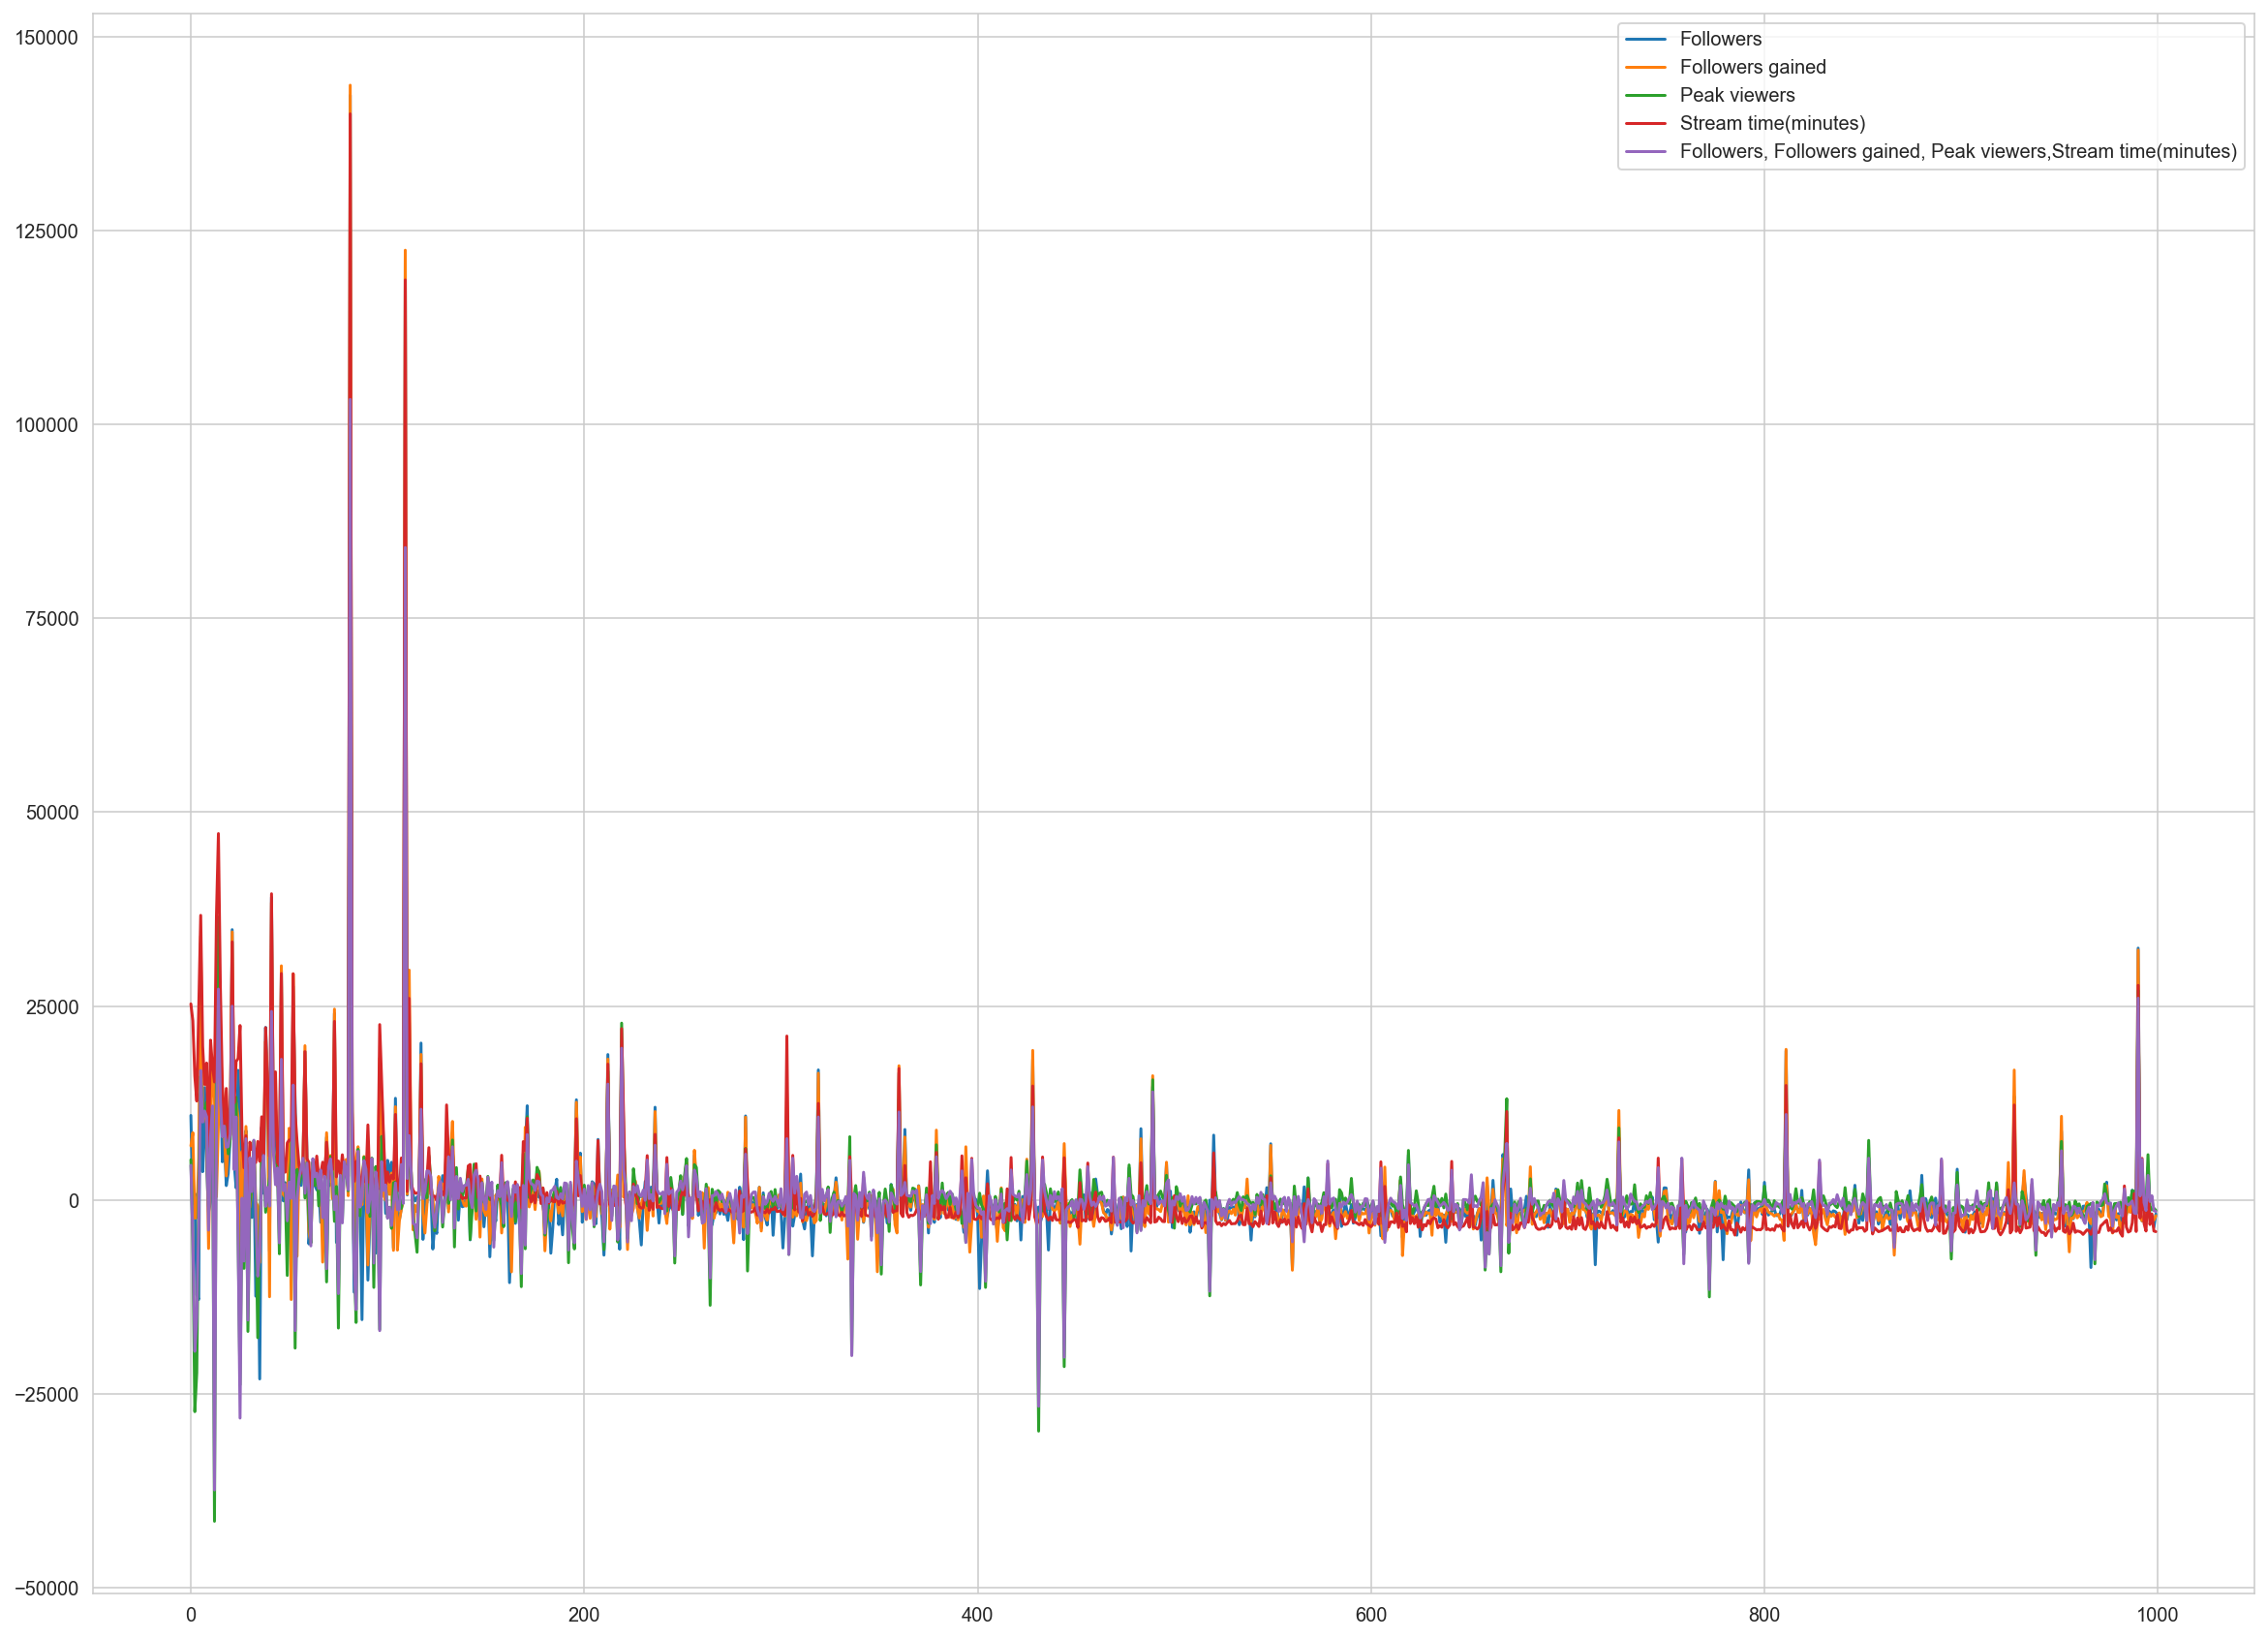

In [132]:
#잔차 그래프 그리기
plt.figure(figsize=(20, 15))
plt.plot(model_1.resid, label='Followers')
plt.plot(model_2.resid, label='Followers gained')
plt.plot(model_3.resid, label='Peak viewers')
plt.plot(model_4.resid, label='Stream time(minutes)')
plt.plot(model_5.resid, label='Followers, Followers gained, Peak viewers,Stream time(minutes)')
plt.legend()
plt.show()


In [19]:
df.columns

Index(['Channel', 'Watch time(Minutes)', 'Stream time(minutes)',
       'Peak viewers', 'Average viewers', 'Followers', 'Followers gained',
       'Views gained', 'Partnered', 'Mature', 'Language', 'Date'],
      dtype='object')

In [249]:
target = df[['Average viewers']]
feature_6 = df[['Watch time(Minutes)', 'Stream time(minutes)', 'Peak viewers', 'Followers', \
                 'Followers gained', 'Views gained','Partnered', 'Mature', 'Date', 'English']]
feature_6 = sm.add_constant(feature_6, has_constant='add')
model_6 = sm.OLS(target, feature_6).fit()

In [ ]:
import statsmodels.api as sm

In [250]:
print(model_5.summary2())

                     Results: Ordinary least squares
Model:                 OLS                Adj. R-squared:       0.501     
Dependent Variable:    Average viewers    AIC:                  20231.5080
Date:                  2020-12-15 23:01   BIC:                  20256.0467
No. Observations:      1000               Log-Likelihood:       -10111.   
Df Model:              4                  F-statistic:          252.2     
Df Residuals:          995                Prob (F-statistic):   1.38e-149 
R-squared:             0.503              Scale:                3.5628e+07
--------------------------------------------------------------------------
                       Coef.   Std.Err.    t    P>|t|    [0.025    0.975] 
--------------------------------------------------------------------------
const                2918.5938 375.1252  7.7803 0.0000 2182.4664 3654.7212
Followers               0.0003   0.0004  0.7412 0.4588   -0.0004    0.0010
Followers gained        0.0023   0.0008  2.7980

In [251]:
print(model_6.summary2())

                       Results: Ordinary least squares
Model:                  OLS                 Adj. R-squared:        0.515     
Dependent Variable:     Average viewers     AIC:                   20209.6643
Date:                   2020-12-15 23:01    BIC:                   20263.6496
No. Observations:       1000                Log-Likelihood:        -10094.   
Df Model:               10                  F-statistic:           107.1     
Df Residuals:           989                 Prob (F-statistic):    4.52e-150 
R-squared:              0.520               Scale:                 3.4651e+07
-----------------------------------------------------------------------------
                       Coef.     Std.Err.    t    P>|t|    [0.025     0.975] 
-----------------------------------------------------------------------------
const                 5101.8441 1349.2987  3.7811 0.0002  2454.0268 7749.6614
Watch time(Minutes)      0.0000    0.0000  5.1214 0.0000     0.0000    0.0000
Stream ti

In [252]:
# Adj,R-squared 값이 0.501 에서 0.516으로 올라감 데이터를 설명하는 영역이 증가

다중공선성 확인(Multicollinearity)
- VIF이용
    - 다중공선성을 해결하는 방법
        - Feature Selection : 중요 변수만 선택하는 방법
            - 단순히 변수를 제거하는 방법(correlation 등의 지표를 보고)
            - Lasso 
            - Stepwise
            - 기타 변수 선택 알고리즘(유전알고리즘 등)
        - 변수를 줄이지 않고 활용하는 방법
            - AutoEncoder등의 Feature Extaraction 기법(딥러닝 기법
            - PCA
            - Ridge

In [253]:
#상관계수 확인
feature_6.corr()

,const,Watch time(Minutes),Stream time(minutes),Peak viewers,Followers,Followers gained,Views gained,Partnered,Mature,Date,English
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Watch time(Minutes),NaN,1.000000,0.150588,0.582797,0.620234,0.514648,0.529862,0.038258,-0.043197,0.037790,0.094492
Stream time(minutes),NaN,0.150588,1.000000,-0.119540,-0.091299,-0.158165,0.064370,-0.007073,0.044978,-0.019371,0.045116
Peak viewers,NaN,0.582797,-0.119540,1.000000,0.532529,0.470415,0.298063,0.028112,-0.082750,0.019987,0.073642
Followers,NaN,0.620234,-0.091299,0.532529,1.000000,0.715618,0.276467,0.044418,-0.088521,0.122110,0.163707
Followers gained,NaN,0.514648,-0.158165,0.470415,0.715618,1.000000,0.244297,0.027465,-0.093001,-0.103026,-0.006353
Views gained,NaN,0.529862,0.064370,0.298063,0.276467,0.244297,1.000000,-0.035313,-0.088119,-0.025051,0.033871
Partnered,NaN,0.038258,-0.007073,0.028112,0.044418,0.027465,-0.035313,1.000000,0.000972,0.138880,0.022780
Mature,NaN,-0.043197,0.044978,-0.082750,-0.088521,-0.093001,-0.088119,0.000972,1.000000,0.072779,0.116251
Date,NaN,0.037790,-0.019371,0.019987,0.122110,-0.103026,-0.025051,0.138880,0.072779,1.000000,0.213450


In [254]:
corr_df = feature_6.corr()
heatmap_df = corr_df.drop(['const']).drop(['const'],axis=1)

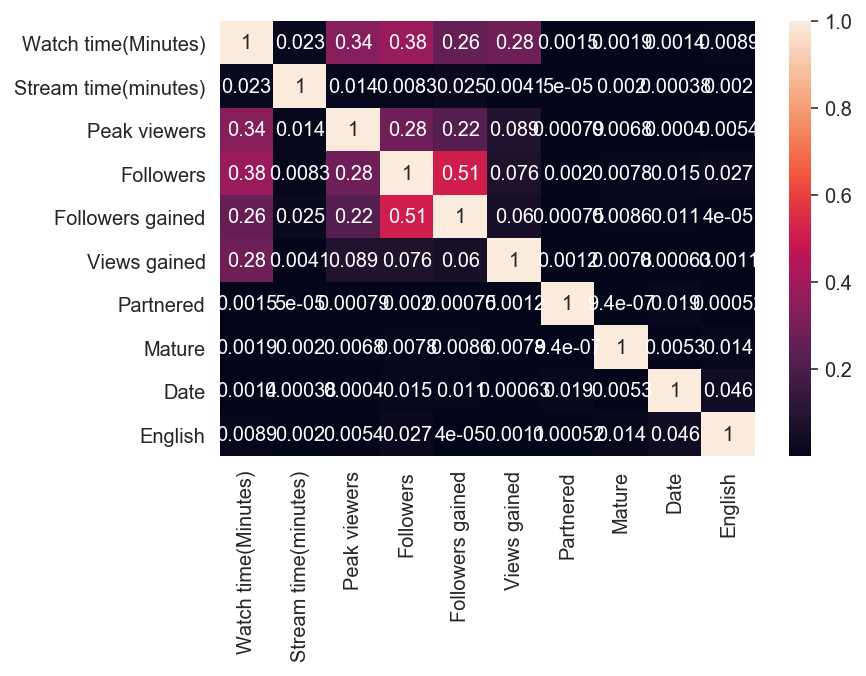

In [255]:
# 결정계수로 확인
# peak viewers와 average viewers가 상관관계가 높은편
sns.heatmap(heatmap_df**2, annot=True)
plt.show()

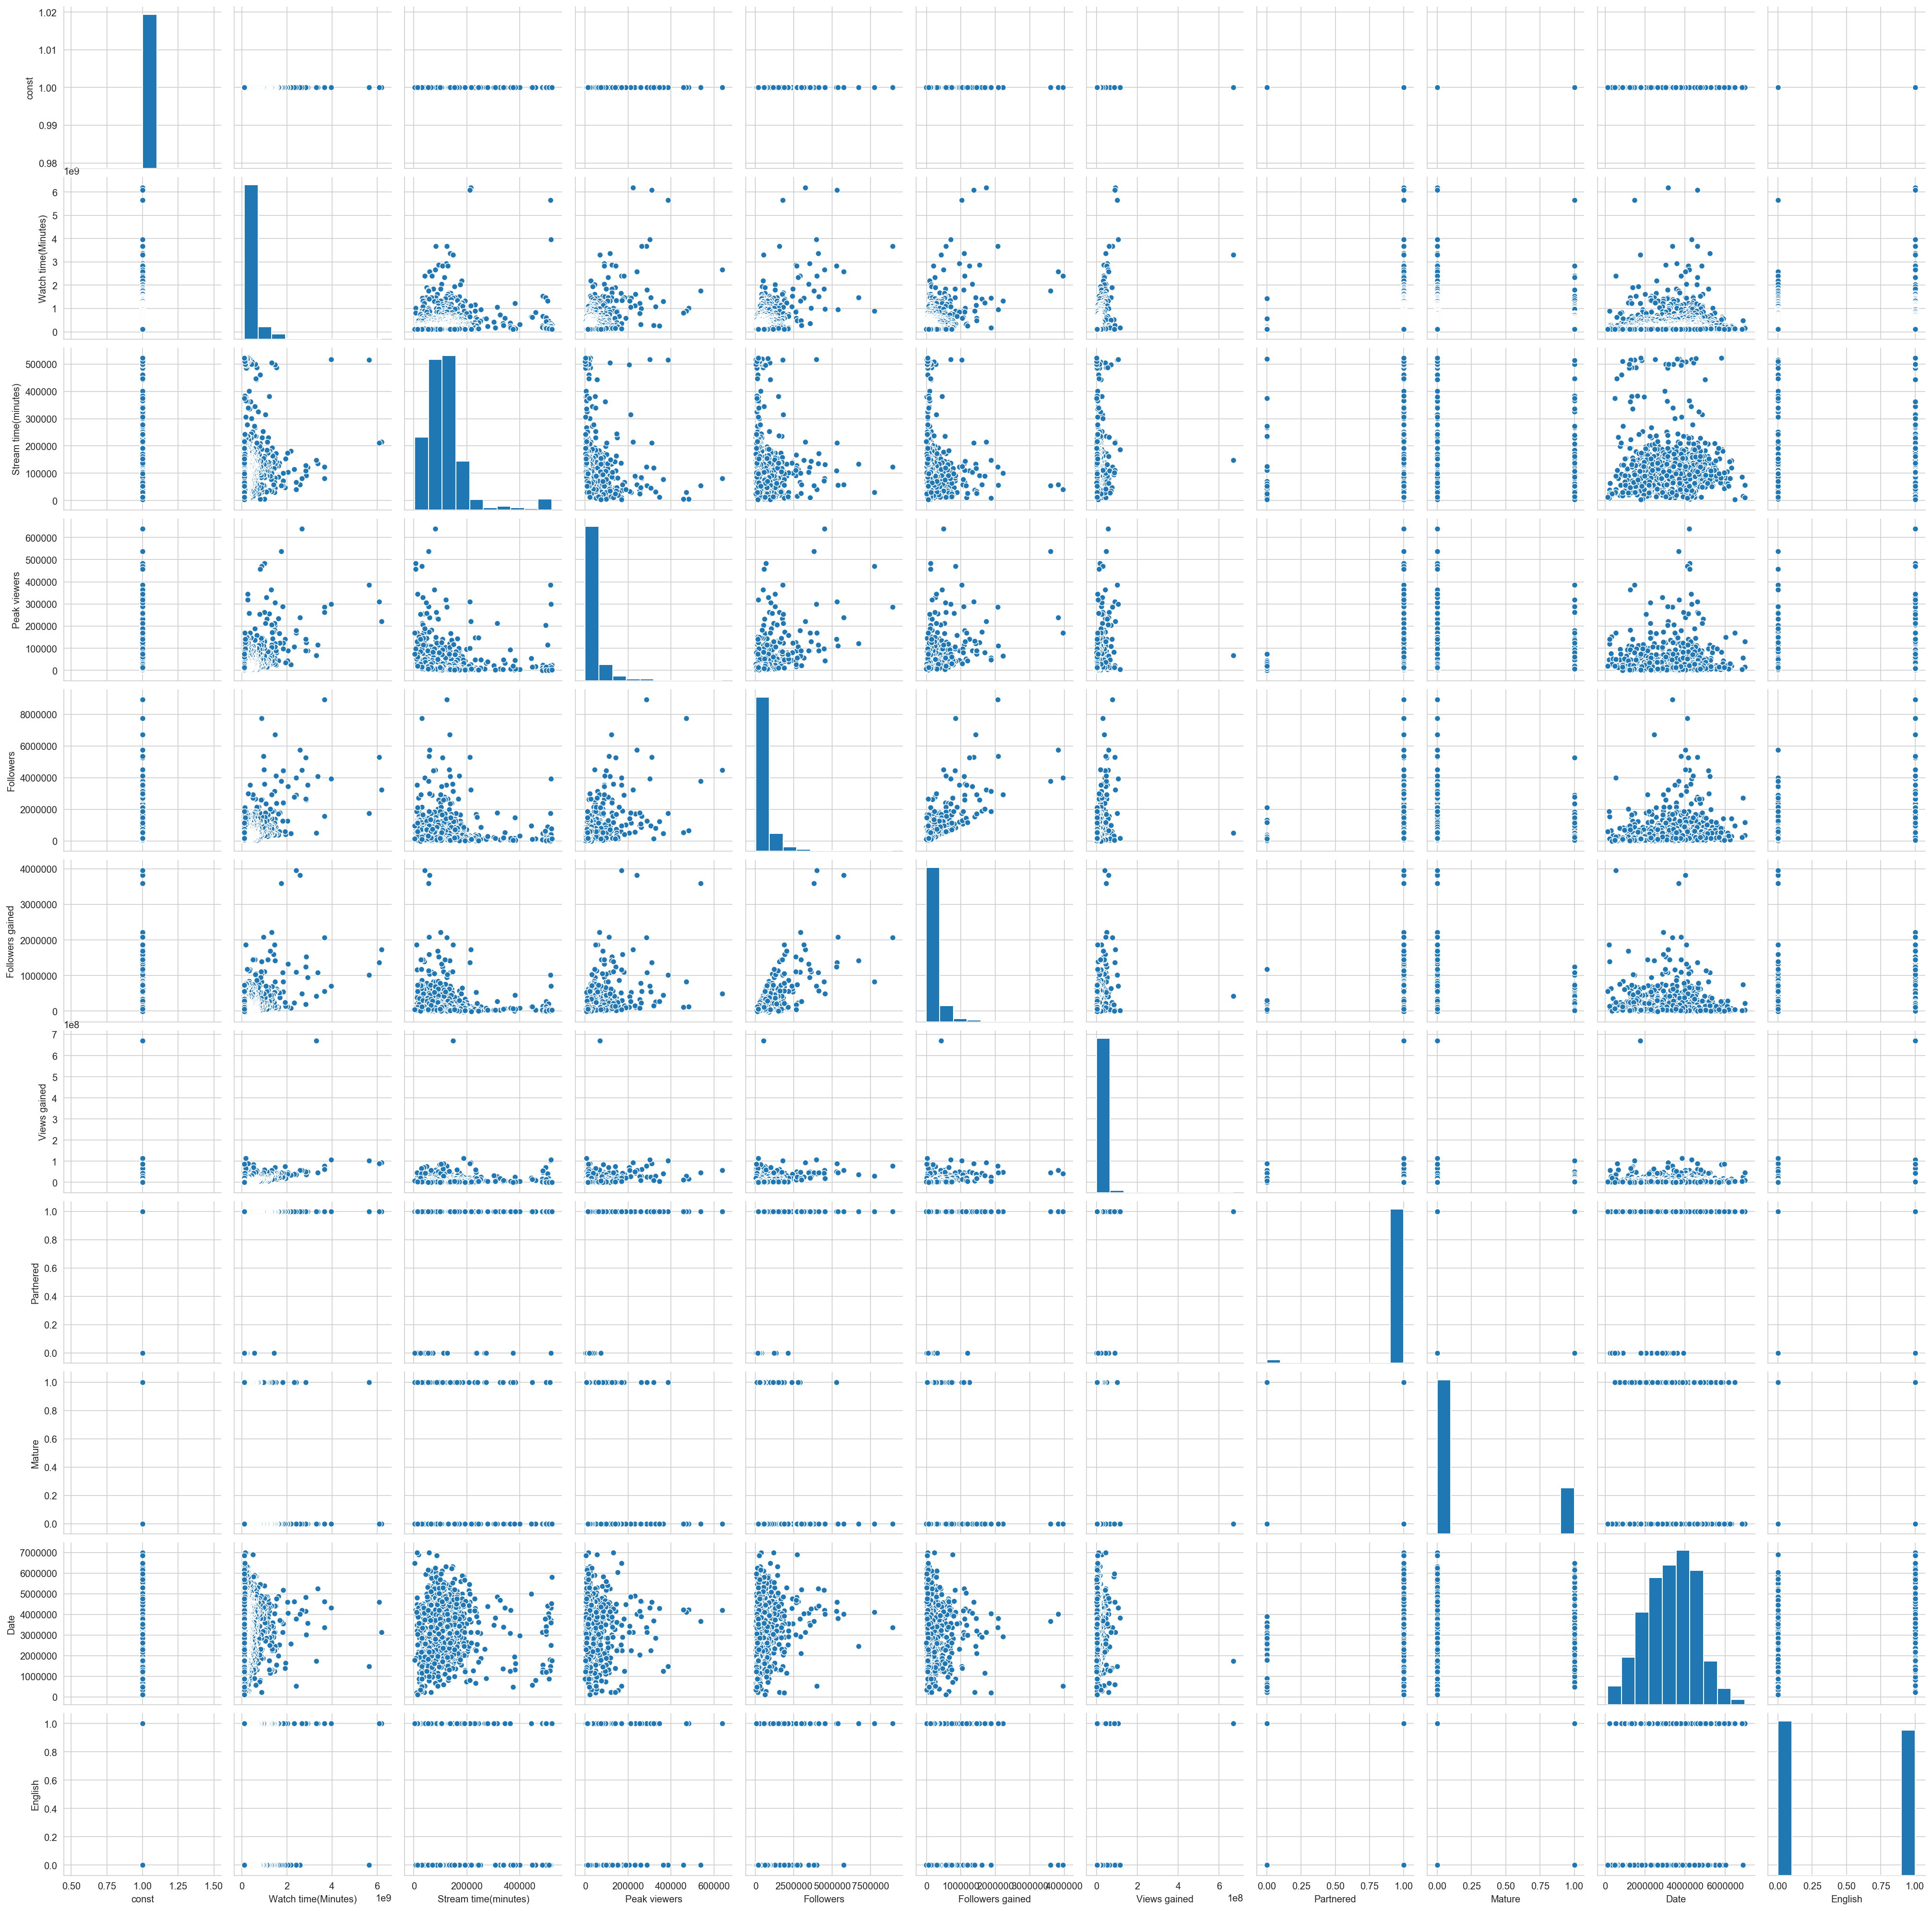

In [256]:
# 산점도 확인
sns.pairplot(feature_6)
plt.show()

#### VIF 이용
- VIF(Variance inflation factor), 변수들간의 Correlation등으로 진단
$$ VIF_i = \frac{1}{1 - R_i^2} $$
결정계수 Rj2 값은 0에서 1의 값을 가지므로 VIF 값은 1에서 무한대의 범위를 갖는다.
    - 1 결정계수 $R_j^2$ 값이 0에 가깝다는 것은 입력변수 k가 다른 입력변수들과 상관성이 거의 없다는 것을 의미하고, 
    - 2 결정계수 $R_j^2$값이 1에 가깝다는 것은 입력변수 k가 다른 입력변수들과 상관성, 즉 다중공선성이 크다는 것을 의미한다.

In [257]:
# VIF 값 1 <= VIF < 10 다중공선성의 문제가 없다고 판단
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.DataFrame({
    "VIF Factor": [variance_inflation_factor(feature_5.values, idx) \
                                                for idx in range(feature_5.shape[1])],
    "features": feature_5.columns,
})

,VIF Factor,features
0,3.949669,const
1,2.285843,Followers
2,2.129524,Followers gained
3,1.434571,Peak viewers
4,1.031089,Stream time(minutes)


In [258]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.DataFrame({
    "VIF Factor": [variance_inflation_factor(feature_6.values, idx) \
                   for idx in range(feature_6.shape[1])],
    "features": feature_6.columns,
})

,VIF Factor,features
0,52.540674,const
1,2.665555,Watch time(Minutes)
2,1.169177,Stream time(minutes)
3,1.719980,Peak viewers
4,2.852982,Followers
5,2.376122,Followers gained
6,1.417873,Views gained
7,1.025481,Partnered
8,1.039651,Mature
9,1.156178,Date


#### 모형의 성능 지표


- MSE : Mean Squared Error
    - 작으면 작을수록 좋지만 과적함의 오류가 생길수 있음
    - $MSE = \frac{1}{n}\sum_{i=1}^{n}[y_i - \hat{f}(x_i)]^2$
        - $n$ : 데이터의 갯수
        - $y_i$ : 실제 종속변수
        - $\hat{f}(x_i)$ : 예측한 종속변수
    - 결과로 나오는 수치가 모델이 어느정도로 좋은 지 알수 없음
    - 다른 모델과 비교할때 상대적으로 값이 낮으면 모델이 더 좋다만 확인 가능


- RMSE : Root Mean Square Error
    - $\sqrt{MSE}$


- MAE : Mean Absolute Error 
    - $MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{f}(x_i)|$
    - 잔차의 절대값을 확인할수 있음
  
- MAPE : Mean Absolute Percentage Error 
    - $MAPE = \frac{100}{n}\sum_{i=1}^{n}| \frac{y_i - \hat{f}(x_i)}{y_i}|$
    - 0% ~ 100%의 값을 가져 0에 가까워질수록 모델의 성능이 좋다고 해석할수 있음

In [259]:
from sklearn.metrics import mean_absolute_error

In [260]:
target = df[['Average viewers']]
feature_7 = df[["Followers", 'Views gained', "Peak viewers"]]
feature_7 = sm.add_constant(feature_7, has_constant='add')
model_7 = sm.OLS(target, feature_7).fit()

In [261]:
target = df[['Average viewers']]
feature_8 = df[["Followers",'Peak viewers', 'Stream time(minutes)']]
feature_8 = sm.add_constant(feature_8, has_constant='add')
model_8 = sm.OLS(target, feature_8).fit()

In [262]:
target = df[['Average viewers']]
feature_9 = df[["Followers", "Followers gained","Stream time(minutes)"]]
feature_9 = sm.add_constant(feature_9, has_constant='add')
model_9 = sm.OLS(target, feature_9).fit()

In [263]:
target = df[['Average viewers']]
feature_10 = df[["Followers", "Followers gained","Stream time(minutes)"]]
feature_10 = sm.add_constant(feature_10, has_constant='add')
model_10 = sm.OLS(target, feature_10).fit()

In [264]:
pred_5 = model_5.predict(feature_5)
mae_5 = mean_absolute_error(pred_5, df['Average viewers'])
mape_5 = mae_5 / np.sum(df['Average viewers']) * 100

pred_6 = model_6.predict(feature_6)
mae_6 = mean_absolute_error(pred_6, df['Average viewers'])
mape_6 = mae_6 / np.sum(df['Average viewers']) * 100

pred_7 = model_7.predict(feature_7)
mae_7 = mean_absolute_error(pred_7, df['Average viewers'])
mape_7 = mae_7 / np.sum(df['Average viewers']) * 100

pred_8 = model_8.predict(feature_8)
mae_8 = mean_absolute_error(pred_8, df['Average viewers'])
mape_8 = mae_8 / np.sum(df['Average viewers']) * 100

pred_9 = model_9.predict(feature_9)
mae_9 = mean_absolute_error(pred_9, df['Average viewers'])
mape_9 = mae_9 / np.sum(df['Average viewers']) * 100

pred_10 = model_10.predict(feature_10)
mae_10 = mean_absolute_error(pred_10, df['Average viewers'])
mape_10 = mae_10 / np.sum(df['Average viewers']) * 100

In [265]:
df.columns

Index(['Channel', 'Watch time(Minutes)', 'Stream time(minutes)', 'Peak viewers', 'Average viewers', 'Followers', 'Followers gained', 'Views gained', 'Partnered', 'Mature', 'Language', 'Date', 'English'], dtype='object')

In [266]:
datas = {
    "model": [5, 6, 7, 8, 9, 10],
    "f-value": [model_5.fvalue, model_6.fvalue, model_7.fvalue, model_8.fvalue, model_9.fvalue, model_10.fvalue],
    "r-squared": [model_5.rsquared, model_6.rsquared, model_7.rsquared, model_8.rsquared, model_9.rsquared, model_10.rsquared],
    "adj. r-squred": [model_5.rsquared_adj, model_6.rsquared_adj, model_7.rsquared_adj, model_8.rsquared_adj, model_9.rsquared_adj, model_10.rsquared_adj],
}

result_df = pd.DataFrame(datas)
result_df

,model,f-value,r-squared,adj. r-squred
0,5,252.213082,0.503456,0.501460
1,6,107.133115,0.519980,0.515126
2,7,298.367611,0.473323,0.471737
3,8,331.402308,0.499550,0.498042
4,9,108.543098,0.246385,0.244115
5,10,108.543098,0.246385,0.244115


- model_5 : "Followers", "Followers gained", "Peak viewers","Stream time(minutes)"
- model_6 : "Followers", "Followers gained", "Peak viewers","Stream time(minutes)","Watch time(Minutes)"
- model_7 : 'Average viewers', 'Stream time(minutes)'
- model_8 : "Followers",'Peak viewers', 'Stream time(minutes)'
- model_9 : "Followers", "Followers gained","Stream time(minutes)"
- model_10: "Followers", "Followers gained","Stream time(minutes)"

In [267]:
result_df['MAE'] =  [mae_5, mae_6, mae_7, mae_8, mae_9, mae_10]
result_df['MAPE'] = [mape_5, mape_6, mape_7, mape_8, mae_9, mae_10]
result_df

,model,f-value,r-squared,adj. r-squred,MAE,MAPE
0,5,252.213082,0.503456,0.501460,2433.736870,0.050904
1,6,107.133115,0.519980,0.515126,2239.262577,0.046836
2,7,298.367611,0.473323,0.471737,2378.742592,0.049754
3,8,331.402308,0.499550,0.498042,2448.730569,0.051218
4,9,108.543098,0.246385,0.244115,2916.530324,2916.530324
5,10,108.543098,0.246385,0.244115,2916.530324,2916.530324


In [268]:
#모델6이 제일 좋음

In [270]:
#outlier제거 모델과 비교.

target = Rdf[['Average viewers']]
feature_11 = Rdf[['Watch time(Minutes)', 'Stream time(minutes)', 'Peak viewers', 'Followers', \
                 'Followers gained', 'Views gained','Partnered', 'Mature', 'Date', 'English']]
feature_11 = sm.add_constant(feature_11, has_constant='add')
model_11 = sm.OLS(target, feature_11).fit()

pred_11 = model_11.predict(feature_11)
mae_11 = mean_absolute_error(pred_11, Rdf['Average viewers'])
mape_11 = mae_11 / np.sum(Rdf['Average viewers']) * 100

In [271]:
# 아웃라이어 제거한 Rdf model_11 / 제거 하지 않은 model_6 모델 비교
datas = {
    "model": [6, 11],
    "f-value": [model_6.fvalue, model_11.fvalue],
    "r-squared": [model_6.rsquared, model_11.rsquared],
    "adj. r-squred": [model_6.rsquared_adj, model_11.rsquared_adj],
}

result_df = pd.DataFrame(datas)
result_df

,model,f-value,r-squared,adj. r-squred
0,6,107.133115,0.519980,0.515126
1,11,174.431397,0.662403,0.658605


In [272]:
print(model_6.summary2())

                       Results: Ordinary least squares
Model:                  OLS                 Adj. R-squared:        0.515     
Dependent Variable:     Average viewers     AIC:                   20209.6643
Date:                   2020-12-15 23:01    BIC:                   20263.6496
No. Observations:       1000                Log-Likelihood:        -10094.   
Df Model:               10                  F-statistic:           107.1     
Df Residuals:           989                 Prob (F-statistic):    4.52e-150 
R-squared:              0.520               Scale:                 3.4651e+07
-----------------------------------------------------------------------------
                       Coef.     Std.Err.    t    P>|t|    [0.025     0.975] 
-----------------------------------------------------------------------------
const                 5101.8441 1349.2987  3.7811 0.0002  2454.0268 7749.6614
Watch time(Minutes)      0.0000    0.0000  5.1214 0.0000     0.0000    0.0000
Stream ti

In [273]:
print(model_11.summary2())

                      Results: Ordinary least squares
Model:                 OLS                 Adj. R-squared:        0.659     
Dependent Variable:    Average viewers     AIC:                   15341.9982
Date:                  2020-12-15 23:01    BIC:                   15394.8245
No. Observations:      900                 Log-Likelihood:        -7660.0   
Df Model:              10                  F-statistic:           174.4     
Df Residuals:          889                 Prob (F-statistic):    7.60e-202 
R-squared:             0.662               Scale:                 1.4639e+06
----------------------------------------------------------------------------
                       Coef.   Std.Err.    t     P>|t|    [0.025     0.975] 
----------------------------------------------------------------------------
const                3446.7348 307.2931  11.2164 0.0000  2843.6303 4049.8393
Watch time(Minutes)     0.0000   0.0000  20.2642 0.0000     0.0000    0.0000
Stream time(minutes)  

In [282]:
# IQR oulier 제거한 모델이 성능이 더 좋게 나옴.  

In [79]:
from sklearn.model_selection import train_test_split
import numpy as np

X = Rdf.drop(columns = ['Channel', 'Average viewers', 'Partnered', 'Language'])
y = Rdf['Average viewers']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((720, 9), (180, 9), (720,), (180,))

In [80]:
# 모델 학습
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

model = LinearRegression().fit(X_train, y_train)

model.coef_, model.intercept_

(array([ 4.47428153e-06, -1.32406960e-02,  6.30276586e-03,  1.04058921e-04,
         1.77307422e-03,  1.71681924e-06,  7.55848254e+01, -1.73395869e-05,
        -2.92751672e+02]),
 2813.148217816368)

In [81]:
# 모델 예측
y_test_pred = model.predict(X_test)

In [82]:
list(y_test[:5]), list(y_test_pred[:5].round(1))

([1728, 6789, 3827, 7134, 5300], [2664.5, 4850.2, 3420.5, 6229.8, 3554.8])

In [83]:
# 모델 평가
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_test_pred)

mse, rmse, mae

(1716782.340979151, 1310.2604096053392, 932.6330956068682)

In [84]:
Rdf.tail()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language,Date,English
995,LITkillah,122524635,13560,21359,9104,601927,562691,2162107,1,0,Spanish,119520.0,0
996,bighead033,122523705,153000,3940,793,213212,52289,4399897,1,0,Korean,2286720.0,0
997,newmasca,122452320,217410,6431,567,109068,-4942,3417970,1,0,Korean,2610720.0,0
998,AndyMilonakis,122311065,104745,10543,1153,547446,109111,3926918,1,0,English,3565440.0,1
999,Remx,122192850,99180,13788,1205,178553,59432,2049420,1,0,French,3520800.0,0


In [85]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def predict_average_viewers(channel):
    X = Rdf.drop(columns = ['Channel', 'Average viewers', 'Partnered', 'Language'])
    y = Rdf['Average viewers']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    estimators = [('scaler', StandardScaler()),
                 ('clf', LinearRegression())]
    pipe = Pipeline(estimators)
    pipe.fit(X_train, y_train)
    
    result = int(round(pipe.predict(channel)[0]))
    
    return result

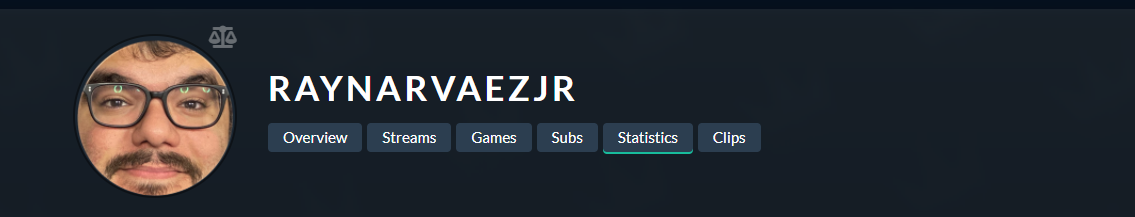

In [318]:
# 예측할 채널
from IPython.display import Image 
Image('r.png')

In [317]:
RAYNARVEZJR = [[50000000,84120,5388,340000,2184,1626543,0,1235,1]] # https://twitchtracker.com/참조
predict_average_viewers(dhtekkz)

1706

In [ ]:
# average viewers of RAYNARVEZJR :  1217